<center><h1>Avhad_Deepa_HW4</h1></center>
<br>
<br>

Name: Deepa Avhad
<br>
Github Username: d-avhad
<br>
USC ID: 7023239026 
<br>
Refrences:
<br>
https://towardsdatascience.com/mastering-p-values-in-machine-learning-bdc5bd0dd8ae
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
https://www.statsmodels.org/stable/index.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [177]:
import os
import sys
import numpy as np
import pandas as pd
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as boot_stats

import seaborn as sn
import matplotlib.pyplot as plt

#from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm

from sklearn.feature_selection import chi2

from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import statsmodels.formula.api as smf



from texttable import Texttable
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix  
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
from imblearn.over_sampling import SMOTE
from collections import Counter


Get the AReM Data Set

In [178]:
# getting folder and files name. (preprocessing of data)

total_folder=os.listdir('../data/AReM/')

print("total folders:",total_folder)

#1.
bending1_folder=os.listdir('../data/AReM/bending1')
bending1_folder.sort()
#print("bending 1 files: ",bending1_folder)

#2.
bending2_folder=os.listdir('../data/AReM/bending2')
bending2_folder.sort()
#print("bending 2 files: ",bending2_folder)

#3.
cycling_folder=os.listdir('../data/AReM/cycling')
cycling_folder.sort()
#print("cycling files: ",cycling_folder)


#4.
lying_folder=os.listdir('../data/AReM/lying')
lying_folder.sort()
#print("lying files: ",lying_folder)

#5.
sitting_folder=os.listdir('../data/AReM/sitting')
sitting_folder.sort()
#print("sitting files: ",sitting_folder)

#6.
standing_folder=os.listdir('../data/AReM/standing')
standing_folder.sort()
#print("standing files: ",standing_folder)

#7.
walking_folder=os.listdir('../data/AReM/walking')
walking_folder.sort()
#print("walking files: ",walking_folder)
    
all_paths=[]   ## 88 instances
trainfile_paths=[] ## 69 instances
testfile_paths=[] ## 19 instances

# copy test data from bending1 and bending2: (dataset1,dataset2)

for i,filename in enumerate(bending1_folder):
    #print filename
    if filename=='dataset1.csv' or filename=='dataset2.csv' :
        all_paths.append('../data/AReM/bending1/'+filename)
        testfile_paths.append('../data/AReM/bending1/'+filename)        
        
for i,filename in enumerate(bending2_folder):
    if filename=='dataset1.csv' or filename=='dataset2.csv':
        all_paths.append('../data/AReM/bending2/'+filename)
        testfile_paths.append('../data/AReM/bending2/'+filename)
        
        
for i,filename in enumerate(lying_folder):
    if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
        all_paths.append('../data/AReM/lying/'+filename)
        testfile_paths.append('../data/AReM/lying/'+filename)        

for i,filename in enumerate(cycling_folder):
    if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
        all_paths.append('../data/AReM/cycling/'+filename)
        testfile_paths.append('../data/AReM/cycling/'+filename)        

for i,filename in enumerate(sitting_folder):
    if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
        all_paths.append('../data/AReM/sitting/'+filename)    
        testfile_paths.append('../data/AReM/sitting/'+filename)        

for i,filename in enumerate(standing_folder):
    if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
        all_paths.append('../data/AReM/standing/'+filename) 
        testfile_paths.append('../data/AReM/standing/'+filename)        

for i,filename in enumerate(walking_folder):
    if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
        all_paths.append('../data/AReM/walking/'+filename) 
        testfile_paths.append('../data/AReM/walking/'+filename)          
        
               
# extracting train data directories:

bending1=['dataset3.csv','dataset4.csv','dataset5.csv','dataset6.csv','dataset7.csv']

bending2=['dataset3.csv','dataset4.csv','dataset5.csv','dataset6.csv']

others=['dataset4.csv','dataset5.csv','dataset6.csv','dataset7.csv','dataset8.csv','dataset9.csv',
           'dataset10.csv','dataset11.csv','dataset12.csv','dataset13.csv','dataset14.csv','dataset15.csv']

for i,filename in enumerate(bending1_folder):
    if filename in bending1:
        all_paths.append('../data/AReM/bending1/'+filename)
        trainfile_paths.append('../data/AReM/bending1/'+filename)        

for i,filename in enumerate(bending2_folder):
    if filename in bending2:
        all_paths.append('../data/AReM/bending2/'+filename)
        trainfile_paths.append('../data/AReM/bending2/'+filename)        

for i,filename in enumerate(lying_folder):
    if filename in others:
        all_paths.append('../data/AReM/lying/'+filename) 
        trainfile_paths.append('../data/AReM/lying/'+filename)         

for i,filename in enumerate(cycling_folder):
    if filename in others:
        all_paths.append('../data/AReM/cycling/'+filename) 
        trainfile_paths.append('../data/AReM/cycling/'+filename)         

for i,filename in enumerate(sitting_folder):
    if filename in others:
        all_paths.append('../data/AReM/sitting/'+filename) 
        trainfile_paths.append('../data/AReM/sitting/'+filename)         

for i,filename in enumerate(standing_folder):
    if filename in others:
        all_paths.append('../data/AReM/standing/'+filename)
        trainfile_paths.append('../data/AReM/standing/'+filename)         

for i,filename in enumerate(walking_folder):
    if filename in others:
        all_paths.append('../data/AReM/walking/'+filename)
        trainfile_paths.append('../data/AReM/walking/'+filename)   
        
#print((trainfile_paths))

print("Total Instances: ",len(all_paths))
print("Training Instances: ",len(trainfile_paths))
print("Testing Instances: ",len(testfile_paths))

print("Each Data File has 480 rows and 6 time-series columns\n")
print('six time series features --\n 1. avg_rss12\n','2. var_rss12\n','3. avg_rss13\n','4. var_rss13\n','5. avg_rss23\n','6. var_rss23\n')


print("\n ------ All file paths: ",len(all_paths)," Instances \n")
i=0
for paths in all_paths:
    print((i+1),". ",paths)
    i=i+1

i=0
print("\n ------- Total test files: ",len(testfile_paths),"Instances \n")
for files in testfile_paths:
        print(i+1,".  ",files)
        i=i+1
 
i=0
print("\n ------- Total train files: ",len(trainfile_paths),"Instances \n")
for files in trainfile_paths:
        print(i+1,".  ",files)
        i=i+1

total folders: ['bending1', 'bending2', 'bendingType.pdf', 'cycling', 'lying', 'sensorsPlacement.pdf', 'sitting', 'standing', 'walking']
Total Instances:  88
Training Instances:  69
Testing Instances:  19
Each Data File has 480 rows and 6 time-series columns

six time series features --
 1. avg_rss12
 2. var_rss12
 3. avg_rss13
 4. var_rss13
 5. avg_rss23
 6. var_rss23


 ------ All file paths:  88  Instances 

1 .  ../data/AReM/bending1/dataset1.csv
2 .  ../data/AReM/bending1/dataset2.csv
3 .  ../data/AReM/bending2/dataset1.csv
4 .  ../data/AReM/bending2/dataset2.csv
5 .  ../data/AReM/lying/dataset1.csv
6 .  ../data/AReM/lying/dataset2.csv
7 .  ../data/AReM/lying/dataset3.csv
8 .  ../data/AReM/cycling/dataset1.csv
9 .  ../data/AReM/cycling/dataset2.csv
10 .  ../data/AReM/cycling/dataset3.csv
11 .  ../data/AReM/sitting/dataset1.csv
12 .  ../data/AReM/sitting/dataset2.csv
13 .  ../data/AReM/sitting/dataset3.csv
14 .  ../data/AReM/standing/dataset1.csv
15 .  ../data/AReM/standing/dataset

### (b) Splitting Data

In [179]:
# taking all data in data frame

def complete_data(all_paths):
    data=dict()

    for i in range(0,len(all_paths),1):
        data[i]=0
        
    name=''
    for i,files in enumerate(all_paths):
        
        df=pd.read_csv(files, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')   
        #print(df)  
        if(files[13:21]=='bending1'):
            name='bend1'
        elif(files[13:21]=='bending2'):
            name='bend2'
        else:
            name=files[13:17] 
        df.loc[:,'activity'] = name
        data[i]=df

    # training_data
    df_alldata=pd.DataFrame()
    df_alldata=data[0]
    for i in range(1,88,1):
        df2=data[i]
        df_alldata=pd.concat([df_alldata,df2], ignore_index=True)
    return df_alldata
    

df_alldata=complete_data(all_paths)

print("\n-------- COMPLETE DATA -----\n")
df_alldata


-------- COMPLETE DATA -----



time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      39.25       0.43      22.75       0.43      33.75   
1         250      39.25       0.43      23.00       0.00      33.00   
2         500      39.25       0.43      23.25       0.43      33.00   
3         750      39.50       0.50      23.00       0.71      33.00   
4        1000      39.50       0.50      24.00       0.00      33.00   
...       ...        ...        ...        ...        ...        ...   
42234  118750      31.50       1.66      12.50       3.20      14.25   
42235  119000      27.33       1.25      11.33       0.94      20.00   
42236  119250      37.80       7.68      14.20       2.48      17.25   
42237  119500      33.75       1.30      15.75       5.21      16.50   
42238  119750      32.67       3.09      18.67       0.47      14.00   

       var_rss23 activity  
0           1.30    bend1  
1           0.00    bend1  
2           0.00    bend1  
3           0.00    bend1  
4           0.00    bend1  
...          ...      ...  
42234       4.44     walk  
42235       4.00     walk  
42236       0.83     walk  
42237       2.69     walk  
42238       3.16     walk  

[42239 rows x 8 columns]

In [180]:
# train Data

def training_datacombined(trainfile_paths):
    training_data=dict()

    for i in range(0,len(trainfile_paths),1):
        training_data[i]=0
    
    name=''

    for i,files in enumerate(trainfile_paths):
        #df=pd.read_csv(files)
        df=pd.read_csv(files, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')
        
        if len(df)!=480 :
            print(files)
        
        if(files[13:21]=='bending1'):
            name='bend1'
        elif(files[13:21]=='bending2'):
            name='bend2'
        else:
            name=files[13:17] 
        df.loc[:,'activity'] = name
        training_data[i]=df

    # training_data
    df_traindata=pd.DataFrame()
   
    df_traindata=training_data[0]
    #print(df_traindata)
    for i in range(1,69,1):
        df2=training_data[i]
        df_traindata=pd.concat([df_traindata,df2], ignore_index=True)

    return df_traindata


df_traindata=training_datacombined(trainfile_paths)
    
print("\n--------TRAINING DATA -----\n")
df_traindata

../data/AReM/sitting/dataset8.csv

--------TRAINING DATA -----



time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      42.00       0.71      21.25       0.43      30.00   
1         250      41.50       0.50      20.25       1.48      31.25   
2         500      41.50       0.50      14.25       1.92      33.00   
3         750      40.75       0.83      15.75       0.43      33.00   
4        1000      40.00       0.71      20.00       2.74      32.75   
...       ...        ...        ...        ...        ...        ...   
33114  118750      31.50       1.66      12.50       3.20      14.25   
33115  119000      27.33       1.25      11.33       0.94      20.00   
33116  119250      37.80       7.68      14.20       2.48      17.25   
33117  119500      33.75       1.30      15.75       5.21      16.50   
33118  119750      32.67       3.09      18.67       0.47      14.00   

       var_rss23 activity  
0           0.00    bend1  
1           1.09    bend1  
2           0.00    bend1  
3           0.00    bend1  
4           0.43    bend1  
...          ...      ...  
33114       4.44     walk  
33115       4.00     walk  
33116       0.83     walk  
33117       2.69     walk  
33118       3.16     walk  

[33119 rows x 8 columns]

In [181]:
# test  data
def testing_datacombined(testfile_paths):
    testing_data=dict()

    for i in range(0,len(testfile_paths),1):
        testing_data[i]=0
        
    name=''

    for i,files in enumerate(testfile_paths):
        
        df=pd.read_csv(files, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')
    
        if(files[13:21]=='bending1'):
            name='bend1'
        elif(files[13:21]=='bending2'):
            name='bend2'
        else:
            name=files[13:17] 
        df.loc[:,'activity'] = name
        testing_data[i]=df


    df_testdata=pd.DataFrame()
    df_testdata=testing_data[0]
    for i in range(1,19,1):
        df2=testing_data[i]
        df_testdata=pd.concat([df_testdata,df2], ignore_index=True)
        
    return df_testdata


df_testdata=testing_datacombined(testfile_paths)

print("\n--------TESTING DATA -----\n")
df_testdata


--------TESTING DATA -----



time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0          0      39.25       0.43      22.75       0.43      33.75   
1        250      39.25       0.43      23.00       0.00      33.00   
2        500      39.25       0.43      23.25       0.43      33.00   
3        750      39.50       0.50      23.00       0.71      33.00   
4       1000      39.50       0.50      24.00       0.00      33.00   
...      ...        ...        ...        ...        ...        ...   
9115  118750      36.00       2.45      17.00       5.10      20.50   
9116  119000      34.33       1.89      15.00       2.45      17.00   
9117  119250      33.00       7.35      14.60       3.14      13.00   
9118  119500      31.67       1.25      11.00       6.16      19.25   
9119  119750      30.75      10.21      11.75       1.09      18.50   

      var_rss23 activity  
0          1.30    bend1  
1          0.00    bend1  
2          0.00    bend1  
3          0.00    bend1  
4          0.00    bend1  
...         ...      ...  
9115       0.87     walk  
9116       2.12     walk  
9117       5.70     walk  
9118       2.17     walk  
9119       3.20     walk  

[9120 rows x 8 columns]

### (c) Feature Extraction

#### i. Research

<font color="blue">
1. Statistical Features: <br>
    a. Mean  <br>
    b. Median <br>
    c. Standard Deviation <br>
    d. Skewness, Kurtosis <br>
    e. Minimum and Maximum
    f. Quantiles(25th,75th and Interquartile ranges
<br><br>
2. Time Series Analysis Related Features: <br>
    a. Cross Correlation <br>
    b. Auto Correlation <br>
    c. Parameters of Autoregressive (AR) part of Autoregressive Integrated Moving Average (ARIMA) model <br>
    d. Parameters of Moving Average (MA) part of ARIMA model <br>
    e. Orders of AR, Integrated (I) and MA part of ARIMA model  
<br><br>
3. Frequency domain related features: <br>
    a. Frequencies of the k peaks in amplitude in the DFTs (discrete Fourier transform) for the detrended d dimensions<br>
    b. k-quantiles of these DFTs.<br>
</font>

In [182]:
# ii. Extraction

'''
ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance. You are free to normalize/standardize features or use them
directly.2
'''

table_columns=['avg_rss12_max', 'avg_rss12_min','avg_rss12_mean','avg_rss12_median','avg_rss12_std','avg_rss12_quart25','avg_rss12_quart75',
            'var_rss12_max', 'var_rss12_min','var_rss12_mean','var_rss12_median','var_rss12_stdt','var_rss12_quart25','var_rss12_quart75',
            'avg_rss13_max', 'avg_rss13_min','avg_rss13_mean','avg_rss13_median','avg_rss13_std','avg_rss13_quart25','avg_rss13_quart75',
            'var_rss13_max', 'var_rss13_min','var_rss13_mean','var_rss13_median','var_rss13_std','var_rss13_quart25','var_rss13_quart75',
            'avg_rss23_max', 'avg_rss23_min','avg_rss23_mean','avg_rss23_median','avg_rss23_std','avg_rss23_quart25','avg_rss23_quart75',
            'var_rss23_max', 'var_rss23_min','var_rss23_mean','var_rss23_median','var_rss23_std','var_rss23_quart25','var_rss23_quart75']


time_feature_table = pd.DataFrame(columns=table_columns)



df_col_names=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

temp=[]

print("\n All instances:")
num=1
for rowid,paths in enumerate(all_paths):
      
    print (num,". ",paths)
    num=num+1
    df=pd.read_csv(paths, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')
    
    for col in df_col_names:
        
        #maximum
        ts_max=df[col].max()
        temp.append(ts_max)

        #minimum
        ts_min=df[col].min()
        temp.append(ts_min)

        #mean
        ts_mean=df[col].mean()
        temp.append(ts_mean)

        #median
        ts_median=df[col].median()
        temp.append(ts_median)

        #standard deviation
        ts_std=df[col].std()
        temp.append(ts_std)

        #first quartile
        ts_quant1=df[col].quantile(0.25)
        temp.append(ts_quant1)

        #third quartile
        ts_quant3=df[col].quantile(0.75)
        temp.append(ts_quant3)
            
    for l,m in enumerate(table_columns):
        time_feature_table.at[rowid,m]=temp[l]
        
    temp=[]
    

print("\nTime domain features of all the data: \n")

time_feature_table.index = np.arange(1, len(time_feature_table) + 1)
time_feature_table.index.name='instance'
time_feature_table


 All instances:
1 .  ../data/AReM/bending1/dataset1.csv
2 .  ../data/AReM/bending1/dataset2.csv
3 .  ../data/AReM/bending2/dataset1.csv
4 .  ../data/AReM/bending2/dataset2.csv
5 .  ../data/AReM/lying/dataset1.csv
6 .  ../data/AReM/lying/dataset2.csv
7 .  ../data/AReM/lying/dataset3.csv
8 .  ../data/AReM/cycling/dataset1.csv
9 .  ../data/AReM/cycling/dataset2.csv
10 .  ../data/AReM/cycling/dataset3.csv
11 .  ../data/AReM/sitting/dataset1.csv
12 .  ../data/AReM/sitting/dataset2.csv
13 .  ../data/AReM/sitting/dataset3.csv
14 .  ../data/AReM/standing/dataset1.csv
15 .  ../data/AReM/standing/dataset2.csv
16 .  ../data/AReM/standing/dataset3.csv
17 .  ../data/AReM/walking/dataset1.csv
18 .  ../data/AReM/walking/dataset2.csv
19 .  ../data/AReM/walking/dataset3.csv
20 .  ../data/AReM/bending1/dataset3.csv
21 .  ../data/AReM/bending1/dataset4.csv
22 .  ../data/AReM/bending1/dataset5.csv
23 .  ../data/AReM/bending1/dataset6.csv
24 .  ../data/AReM/bending1/dataset7.csv
25 .  ../data/AReM/bending

avg_rss12_max avg_rss12_min avg_rss12_mean avg_rss12_median  \
instance                                                               
1                 45.0         37.25      40.624792             40.5   
2                45.67          38.0      42.812812             42.5   
3                 51.0         12.75      24.562958            24.25   
4                42.75           0.0      27.464604             28.0   
5                 30.0          23.5      27.716375             27.5   
...                ...           ...            ...              ...   
84               46.25         20.75      34.763333            35.29   
85                51.0          21.5      34.935813             35.5   
86               47.67         18.33      34.333042            34.75   
87               45.75         18.33      34.599875           35.125   
88               43.67          15.5      34.225875            34.75   

         avg_rss12_std avg_rss12_quart25 avg_rss12_quart75 var_rss12_max  \
instance                                                                   
1             1.476967             39.25              42.0           1.3   
2              1.43555              42.0             43.67          1.22   
3             3.737514           23.1875              26.5          6.87   
4             3.583582              25.5              30.0          7.76   
5             1.442253              27.0              29.0          1.79   
...                ...               ...               ...           ...   
84            4.742208             31.67             38.25         12.68   
85            4.645944              32.0           38.0625         12.21   
86             4.94877             31.25              38.0         12.48   
87             4.73179              31.5              38.0         15.37   
88            4.441798             31.25             37.25         17.24   

         var_rss12_min var_rss12_mean  ... avg_rss23_std avg_rss23_quart25  \
instance                               ...                                   
1                  0.0       0.358604  ...      2.188449              33.0   
2                  0.0       0.372438  ...      1.995255              32.0   
3                  0.0       0.590833  ...      3.693786              20.5   
4                  0.0       0.449708  ...      5.053642              15.0   
5                  0.0       0.363688  ...      4.074511               5.5   
...                ...            ...  ...           ...               ...   
84                 0.0       4.223792  ...      3.174681             14.25   
85                 0.0        4.11575  ...      3.192058           14.2375   
86                 0.0       4.396958  ...      3.000493             13.75   
87                 0.0       4.398833  ...      2.905688              14.0   
88                 0.0         4.3545  ...       2.99292             14.33   

         avg_rss23_quart75 var_rss23_max var_rss23_min var_rss23_mean  \
instance                                                                
1                     36.0          1.92           0.0       0.570583   
2                     34.5          3.11           0.0       0.571083   
3                     27.0          4.97           0.0       0.700188   
4                    20.75          6.76           0.0       1.122125   
5                    10.75           4.5           0.0       0.734271   
...                    ...           ...           ...            ...   
84                   18.33          9.39           0.0       3.288271   
85                   18.25         10.21           0.0       3.280021   
86                    18.0          8.01           0.0       3.261583   
87                   18.25          8.86           0.0       3.289542   
88                   18.25          9.42           0.0       3.479542   

         var_rss23_median var_rss23_std var_rss23_quart25 var_rss23_quart75  
instance                                

In [183]:
# iii.  Standard deviation

'''
iii. Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python’s bootstrapped or any other
method to build a 90% bootsrap confidence interval for the standard deviation
of each feature.
'''

def calculate_std_deviation(time_feature_table):
    std_estimate = pd.DataFrame(time_feature_table.std())
    std_estimate.columns=['STD_Deviation']
    return std_estimate


def calculate_CI(std_estimate,time_feature_table):
    confidence_intervals=pd.DataFrame(columns=["CI for Standard Deviation"])
    
    lower_bound=pd.DataFrame(columns=["CI_Lower_Bound"])
    upper_bound=pd.DataFrame(columns=["CI_upper_bound"])
    
    for i,colname in enumerate(time_feature_table):
        
        arr=np.asarray(time_feature_table[colname]).astype(np.float64)
        feature_CI = bs.bootstrap(arr,stat_func = boot_stats.std,alpha=0.1)
        
        confidence_intervals.loc[colname] = feature_CI.value
        lower_bound.loc[colname]=feature_CI.lower_bound
        upper_bound.loc[colname]=feature_CI.upper_bound
        
    Bootstrap_SD=pd.concat([std_estimate,confidence_intervals, lower_bound,upper_bound ],ignore_index=True, axis=1)
    Bootstrap_SD.columns=['STD_Deviation','CI_value','CI_Lower_Bound', 'CI_Upper_Bound']
    return Bootstrap_SD



std_dev = calculate_std_deviation(time_feature_table)
Bootstrap_CI = calculate_CI(std_dev,time_feature_table)

print("\nEstimated Standard Deviation and their 90% bootsrap confidence interval (CI) for the standard deviation of each feature\n")
Bootstrap_CI




Estimated Standard Deviation and their 90% bootsrap confidence interval (CI) for the standard deviation of each feature



STD_Deviation  CI_value  CI_Lower_Bound  CI_Upper_Bound
avg_rss12_max           4.394362  4.369322        3.473605        5.401515
avg_rss12_min           9.569975  9.515445        8.314260       10.793160
avg_rss12_mean          5.335718  5.305314        4.760306        5.919252
avg_rss12_median        5.440054  5.409056        4.865938        6.056279
avg_rss12_std           1.772153  1.762056        1.584674        1.958079
avg_rss12_quart25       6.153590  6.118526        5.641349        6.690186
avg_rss12_quart75       5.138925  5.109643        4.420651        5.909894
var_rss12_max           5.062729  5.033882        4.689890        5.472619
var_rss12_min           0.000000  0.000000        0.000000        0.000000
var_rss12_mean          1.574164  1.565194        1.433131        1.745132
var_rss12_median        1.412244  1.404197        1.271051        1.578813
var_rss12_stdt          0.884105  0.879068        0.821358        0.960107
var_rss12_quart25       0.946386  0.940994        0.853531        1.055486
var_rss12_quart75       2.125266  2.113157        1.944202        2.344548
avg_rss13_max           4.875137  4.847358        4.249047        5.530503
avg_rss13_min           2.956462  2.939616        2.788965        3.136872
avg_rss13_mean          4.008380  3.985540        3.510495        4.583181
avg_rss13_median        4.036396  4.013397        3.513935        4.604363
avg_rss13_std           0.946710  0.941316        0.766959        1.125712
avg_rss13_quart25       4.220658  4.196608        3.715310        4.774632
avg_rss13_quart75       4.171628  4.147858        3.621818        4.790230
var_rss13_max           2.183625  2.171183        1.994574        2.384073
var_rss13_min           0.000000  0.000000        0.000000        0.000000
var_rss13_mean          1.166114  1.159470        1.103363        1.247782
var_rss13_median        1.145586  1.139058        1.083359        1.228823
var_rss13_std           0.458242  0.455631        0.428824        0.492097
var_rss13_quart25       0.843620  0.838813        0.791769        0.906703
var_rss13_quart75       1.552504  1.543658        1.469982        1.666764
avg_rss23_max           5.741238  5.708524        4.897644        6.684042
avg_rss23_min           6.124001  6.089107        4.671746        7.783185
avg_rss23_mean          5.675593  5.643253        4.585092        6.876055
avg_rss23_median        5.813782  5.780655        4.698366        7.087016
avg_rss23_std           1.024898  1.019058        0.822098        1.229113
avg_rss23_quart25       6.096465  6.061727        4.927131        7.311467
avg_rss23_quart75       5.531720  5.500200        4.532446        6.712677
var_rss23_max           2.518921  2.504568        2.267617        2.768614
var_rss23_min           0.045838  0.045577        0.013125        0.091154
var_rss23_mean          1.154812  1.148232        1.088052        1.242186
var_rss23_median        1.086474  1.080284        1.018296        1.170582
var_rss23_std           0.517617  0.514668        0.487163        0.552828
var_rss23_quart25       0.758584  0.754261        0.704913        0.825518
var_rss23_quart75       1.523599  1.514918        1.436539        1.638328

#### iv. Important features:

<font color='blue'>
Following three time-domain features can be considered most important: <br>
1. Mean: It is the best measure of central tendency when the data distribution is continuous. <br>
2. Standard Deviation: It is an ideal measure of dispersion. <br>
3. Median: It is a good feature of central tendency that is less affected by outliers and skewed data. <br><br>
    
These are the time domain features which will give us a better idea about the curve and the underlying patterns, hence can be considered important.
</font>


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [184]:
'''
i. Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. (See
p. 129 of the textbook)

'''
# Note: for binary classification, let class=1 means Bending  and class=0 means Non Bending (rest other activities)

def func_features_extract(trainfile_paths):
    
    ## Columns:  1,2 and 6
    t_series=['avg_rss12','var_rss12','var_rss23']  
    
    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std',
            'class'] 
    feature_row=[]
    val= pd.DataFrame(columns=column)
    
    for rowidx,paths in enumerate(trainfile_paths):      
        #print(paths)     
        df=pd.read_csv(paths, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')     
        for col in t_series:   
            
            # feature 1: mean
          
            ts_mean=df[col].mean()
            feature_row.append(ts_mean)

            # feature 2: median
            
            ts_median=df[col].median()
            feature_row.append(ts_median)

            # feature 3: standard deviation
            ts_std=df[col].std()
            feature_row.append(ts_std)

        if('bending' in paths):
            feature_row.append(1)
        else:
            feature_row.append(0)
            
        for colidx,colname in enumerate(column):
            val.at[rowidx,colname]=feature_row[colidx]
        feature_row=[]
        
    return val
  
    
features_extract = func_features_extract(trainfile_paths)

print("\nLet class=1 means Bending Activity and class=0 means Non Bending (rest other activities)")
print("\nFeatures mentioned in 1(c)iv are :\n1. Mean\n2. Median\n3. Standard Deviation")
print("\nData showing above features computed for time series 1,2 and 6 and classifiying bending from non-bending:")
features_extract


Let class=1 means Bending Activity and class=0 means Non Bending (rest other activities)

Features mentioned in 1(c)iv are :
1. Mean
2. Median
3. Standard Deviation

Data showing above features computed for time series 1,2 and 6 and classifiying bending from non-bending:


avg_rss12_mean avg_rss12_median avg_rss12_std var_rss12_mean  \
0         43.9545            44.33      1.558835        0.42625   
1       42.179813             43.5      3.670666       0.696042   
2       41.678063            41.75       2.24349       0.535979   
3       43.454958            43.25      1.386098       0.378083   
4       43.969125             44.5      1.618364       0.413125   
..            ...              ...           ...            ...   
64      34.763333            35.29      4.742208       4.223792   
65      34.935813             35.5      4.645944        4.11575   
66      34.333042            34.75       4.94877       4.396958   
67      34.599875           35.125       4.73179       4.398833   
68      34.225875            34.75      4.441798         4.3545   

   var_rss12_median var_rss12_std var_rss23_mean var_rss23_median  \
0              0.47       0.33869       0.493292             0.43   
1               0.5       0.63086       0.613521              0.5   
2               0.5      0.405469       0.383292             0.43   
3              0.47      0.315566       0.679646              0.5   
4              0.47      0.263111       0.555313             0.49   
..              ...           ...            ...              ...   
64              3.9      2.278004       3.288271             3.27   
65            3.845      2.335243       3.280021            3.015   
66              3.9       2.56868       3.261583             2.98   
67            4.025      2.538521       3.289542            3.015   
68              3.9      2.518991       3.479542             3.27   

   var_rss23_std class  
0       0.513506     1  
1       0.524317     1  
2       0.389164     1  
3       0.622534     1  
4       0.487826     1  
..           ...   ...  
64      1.647528     0  
65      1.700918     0  
66       1.61729     0  
67       1.68017     0  
68      1.761146     0  

[69 rows x 10 columns]


Scatter Plot for time domain features for time series 1,2 and 6 and classifiying bending from non-bending

Class 1 : Bending
Class 0 : Non Bending



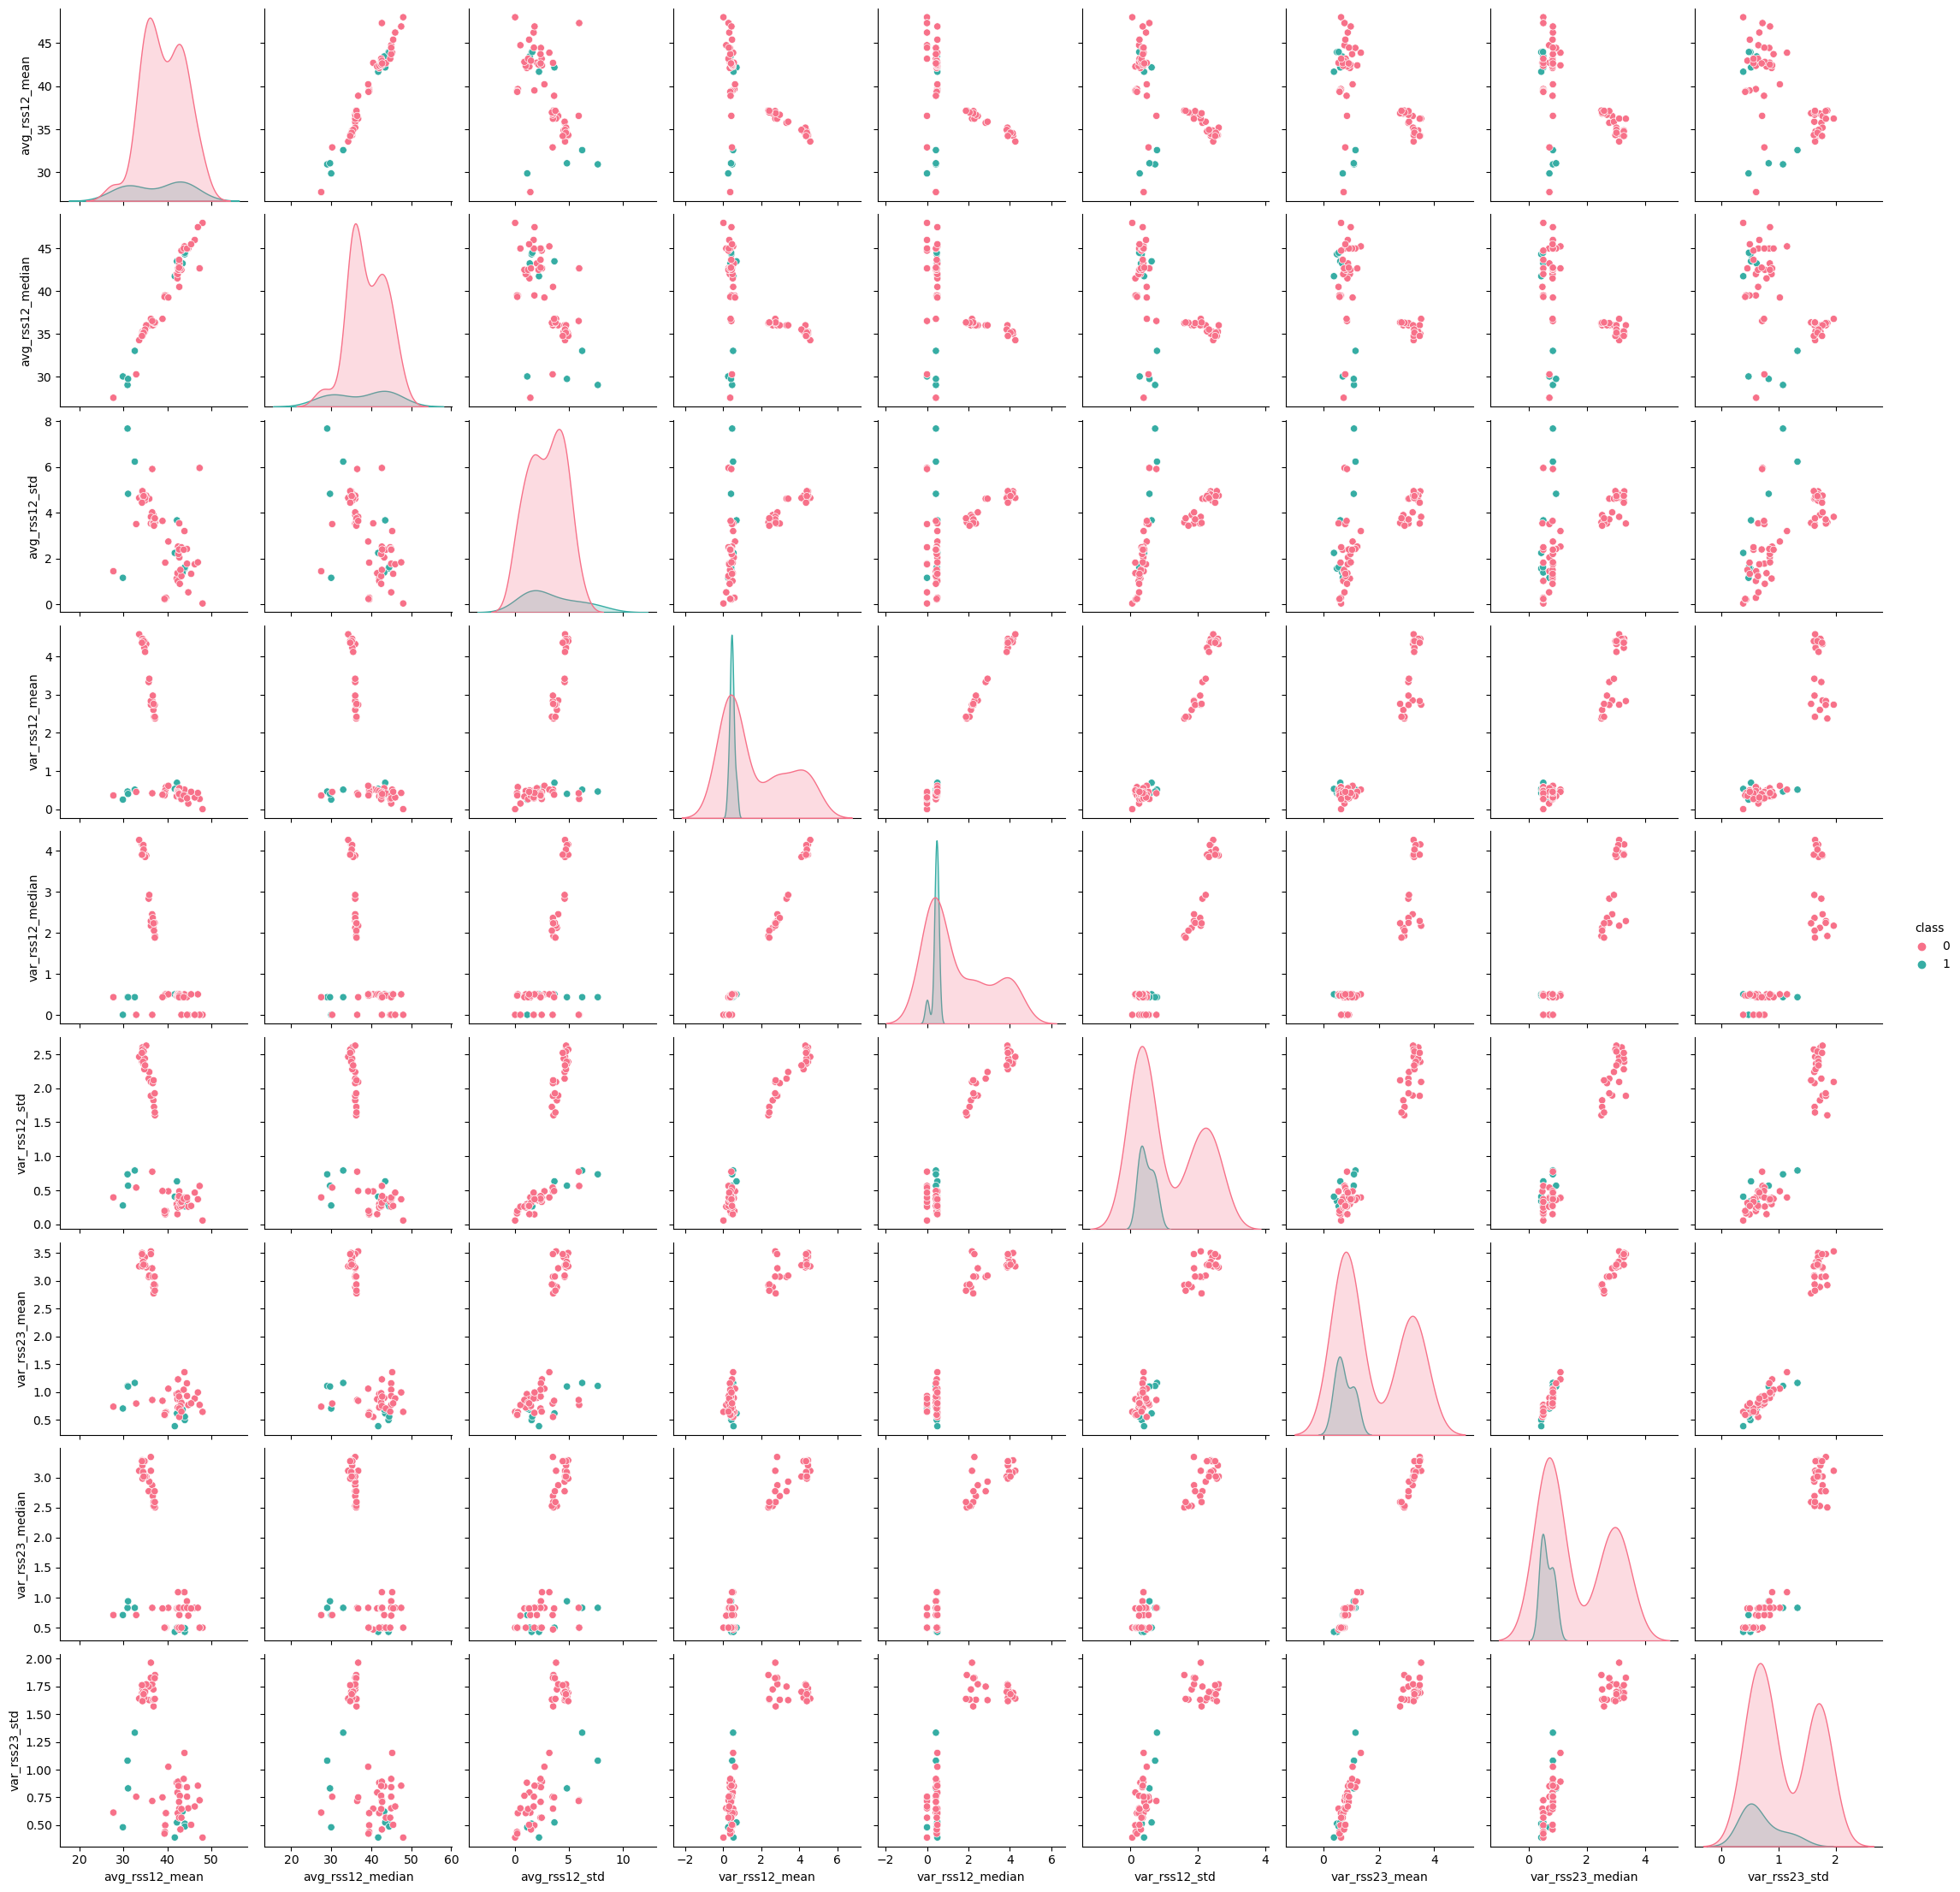

In [185]:
print("\nScatter Plot for time domain features for time series 1,2 and 6 and classifiying bending from non-bending") 
print("\nClass 1 : Bending\nClass 0 : Non Bending\n")
column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std']
#plt.figure(figsize=(20,20))
sn.pairplot(features_extract,vars=column,hue="class",diag_kind='kde',palette='husl')
plt.show()
       



#### ii. Splitted Plots

In [186]:
'''
ii. Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 2(a)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable difference in
the results with those of 2(a)i?
'''


def split_timeseries_into_two(trainfile_paths):
    time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    time_series2=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23',
                  'avg_rss12_2','var_rss12_2','avg_rss13_2','var_rss13_2','avg_rss23_2','var_rss23_2']

    col_part1=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    col_part2=['avg_rss12_2','var_rss12_2','avg_rss13_2','var_rss13_2','avg_rss23_2','var_rss23_2']

    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std',
            'class']
    
    

    time_series1=['avg_rss12','var_rss12','var_rss23']

    feature_row1=[]
    feature_row2=[]

    trainingdata_split = pd.DataFrame(columns=time_series2)


    time_domain_bending_set1 = pd.DataFrame(columns=column)
    time_domain_bending_set2 = pd.DataFrame(columns=column)


    for rowid,paths in enumerate(trainfile_paths):
        #df=pd.read_csv(paths)
        
        df=pd.read_csv(paths, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')     
        #print(len(df))
        
        df_split1=df.loc[:239,:]
        
        df_split1=df_split1.drop(["time"], axis=1)
        df_split1.columns=col_part1
        df_split2=df.loc[240:,:]
        df_split2=df_split2.drop(["time"], axis=1)
        df_split2.columns=col_part2
        
        if(len(df)==479):
            df_split2.index = range(239)
        else:  
            df_split2.index = range(240)

        for col in col_part1:
            trainingdata_split[col]=df_split1[col]

        for col in col_part2:
            trainingdata_split[col]=df_split2[col]
            



    for rowidx,paths in enumerate(trainfile_paths):
        #df=pd.read_csv(paths)
        df=pd.read_csv(paths, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')     
        
        df_split1=df.loc[:239,:]
        df_split1=df_split1.drop(["time"], axis=1)
        df_split1.columns=col_part1
        df_split2=df.loc[240:,:]
        df_split2=df_split2.drop(["time"], axis=1)
        
        #df_split2.index = range(240)
        
        if(len(df)==479):
            df_split2.index = range(239)
        else:  
            df_split2.index = range(240)
        
        
        
        df_split2.columns=col_part1

        for col in time_series1:
            ts_mean1=df_split1[col].mean()
            ts_mean2=df_split2[col].mean()
            feature_row1.append(ts_mean1)
            feature_row2.append(ts_mean2)

            ts_median1=df_split1[col].median()
            ts_median2=df_split2[col].median()      
            feature_row1.append(ts_median1)
            feature_row2.append(ts_median2)        

            ts_std1=df_split1[col].std()
            ts_std2=df_split2[col].std()
            feature_row1.append(ts_std1)
            feature_row2.append(ts_std2)

        if('bending' in paths):
            feature_row1.append(1)
            feature_row2.append(1)
        else:
            feature_row1.append(0)
            feature_row2.append(0)

        for colidx,colname in enumerate(column):
            time_domain_bending_set1.at[rowidx,colname]=feature_row1[colidx]
            time_domain_bending_set2.at[rowidx,colname]=feature_row2[colidx]

        feature_row1=[]  
        feature_row2=[] 
    
    
    return trainingdata_split,time_domain_bending_set1,time_domain_bending_set2
    
           
column_2=['avg_rss12_mean_2', 'avg_rss12_median_2','avg_rss12_std_2',
            'var_rss12_mean_2','var_rss12_median_2','var_rss12_std_2',
            'var_rss23_mean_2','var_rss23_median_2','var_rss23_std_2',
            'class']        
trainingdata_split,time_domain_bending_set1,time_domain_bending_set2=split_timeseries_into_two(trainfile_paths)
time_domain_bending_set2.columns=column_2





In [187]:
print("Breaking each time series training set into two (approximately) equal length time series:")
trainingdata_split

Breaking each time series training set into two (approximately) equal length time series:


avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0        32.25       5.76      14.00       4.36      18.00       2.12   
1        37.75       5.07      15.50       3.20      14.75       1.79   
2        34.50       2.60      20.00       4.74      20.50       2.87   
3        23.75       5.36      11.75       6.22      14.25       3.77   
4        41.25       3.77      15.00       6.63      11.50       2.69   
..         ...        ...        ...        ...        ...        ...   
235      37.25       4.26      16.25       3.63      14.50       2.60   
236      24.25       3.27      12.25       1.79      13.50       5.59   
237      27.25       7.98      17.75       4.44      13.00       6.52   
238      41.00       4.06      16.00       3.24      15.50       5.41   
239      31.50       3.20      17.75       2.68      15.50       3.04   

     avg_rss12_2  var_rss12_2  avg_rss13_2  var_rss13_2  avg_rss23_2  \
0          37.50         1.50        20.75         0.43        11.00   
1          30.75         6.30        16.50         3.35        14.33   
2          26.25         3.34        19.00         0.71        14.75   
3          37.00         8.92        16.33         5.25        15.33   
4          35.50         5.55        19.75         3.49        21.75   
..           ...          ...          ...          ...          ...   
235        31.50         1.66        12.50         3.20        14.25   
236        27.33         1.25        11.33         0.94        20.00   
237        37.80         7.68        14.20         2.48        17.25   
238        33.75         1.30        15.75         5.21        16.50   
239        32.67         3.09        18.67         0.47        14.00   

     var_rss23_2  
0           2.35  
1           4.78  
2           1.09  
3           5.79  
4           1.30  
..           ...  
235         4.44  
236         4.00  
237         0.83  
238         2.69  
239         3.16  

[240 rows x 12 columns]

In [188]:
data_column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std',
       'avg_rss12_mean_2', 'avg_rss12_median_2','avg_rss12_std_2',
            'var_rss12_mean_2','var_rss12_median_2','var_rss12_std_2',
            'var_rss23_mean_2','var_rss23_median_2','var_rss23_std_2',
            'class']

part1=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std']

part2=['avg_rss12_mean_2', 'avg_rss12_median_2','avg_rss12_std_2',
            'var_rss12_mean_2','var_rss12_median_2','var_rss12_std_2',
            'var_rss23_mean_2','var_rss23_median_2','var_rss23_std_2',
            'class']

parted_data= pd.DataFrame(columns=data_column)

for col in part1:
    parted_data[col]=time_domain_bending_set1[col]
for col in part2:
    parted_data[col]=time_domain_bending_set2[col]

print("Time Domain Feature tables(mean,median and std)")
print("Of columns: 'avg_rss12' , 'var_rss12' ,'var_rss23' ")
print("'avg_rss12_2' , 'var_rss12_2' , 'var_rss23_2' ")

print("\nClass 1 : Bending\nClass 0 : Non Bending")
parted_data

Time Domain Feature tables(mean,median and std)
Of columns: 'avg_rss12' , 'var_rss12' ,'var_rss23' 
'avg_rss12_2' , 'var_rss12_2' , 'var_rss23_2' 

Class 1 : Bending
Class 0 : Non Bending


avg_rss12_mean avg_rss12_median avg_rss12_std var_rss12_mean  \
0       44.057167             44.5      1.556971       0.381042   
1       43.278875             45.0      3.473355       0.673292   
2       41.621208            42.33      3.118644       0.623083   
3       44.117042             45.0      1.359836       0.250042   
4       43.486208            43.71      1.281976       0.378667   
..            ...              ...           ...            ...   
64       34.96625             35.5      4.733014       4.207958   
65      34.737042             35.5      4.276717       4.217333   
66      33.886458           34.375      5.143776       4.332208   
67      34.836458            35.75      4.869092        4.25775   
68      34.329333            34.71      4.549837       4.315917   

   var_rss12_median var_rss12_std var_rss23_mean var_rss23_median  \
0              0.47       0.32954        0.59825              0.5   
1             0.485      0.634285       0.640958            0.765   
2               0.5      0.489595       0.419083             0.43   
3               0.0      0.314099       0.815417             0.71   
4              0.47      0.284434       0.524875             0.47   
..              ...           ...            ...              ...   
64              3.9       2.33194       3.146333            3.035   
65             4.03      2.337759       3.334125              3.0   
66              3.9      2.453111       3.248417            3.015   
67             3.77      2.512633       3.169625             2.87   
68             3.88      2.470266        3.38125             3.18   

   var_rss23_std avg_rss12_mean_2 avg_rss12_median_2 avg_rss12_std_2  \
0       0.526656        43.851833               43.5        1.557168   
1       0.554542         41.08075               42.0        3.537481   
2         0.4112        41.734917               41.5         0.59592   
3       0.718016        42.792875              42.67        1.058792   
4       0.486847        44.452042               44.5        1.771251   
..           ...              ...                ...             ...   
64      1.638218        34.560417               35.0        4.752584   
65      1.737573        35.134583             35.585        4.989014   
66      1.565557        34.779625               35.0        4.714249   
67       1.64764        34.363292               35.0        4.588342   
68       1.72569        34.122417              34.75        4.338107   

   var_rss12_mean_2 var_rss12_median_2 var_rss12_std_2 var_rss23_mean_2  \
0          0.471458                0.5        0.342346         0.388333   
1          0.718792                0.5        0.627915         0.586083   
2          0.448875                0.5         0.27305           0.3475   
3          0.506125                0.5        0.260761         0.543875   
4          0.447583                0.5        0.235493          0.58575   
..              ...                ...             ...              ...   
64         4.239625               3.96        2.227526         3.430208   
65         4.014167               3.67        2.333172         3.225917   
66         4.461708              3.935        2.682846          3.27475   
67         4.539917              4.075        2.561608         3.409458   
68         4.393083              4.025        2.571376         3.577833   

   var_rss23_median_2 var_rss23_std_2 class  
0                 0.0        0.478528     1  
1                0.47        0.491873     1  
2                0.43        0.363144     1  
3                 0.5        0.473445     1  
4                 0.5        0.487918     1  
..                ...             ...   ...  
64               3.35        1.647979     0  
65              3.085        1.665326     0  
66              2.955        1.670593     0  
67               3.11        1.707089     0  
68               3.29        1.794112     0  

[69 rows x 19 columns]

Scatter Plot for Split columns: 


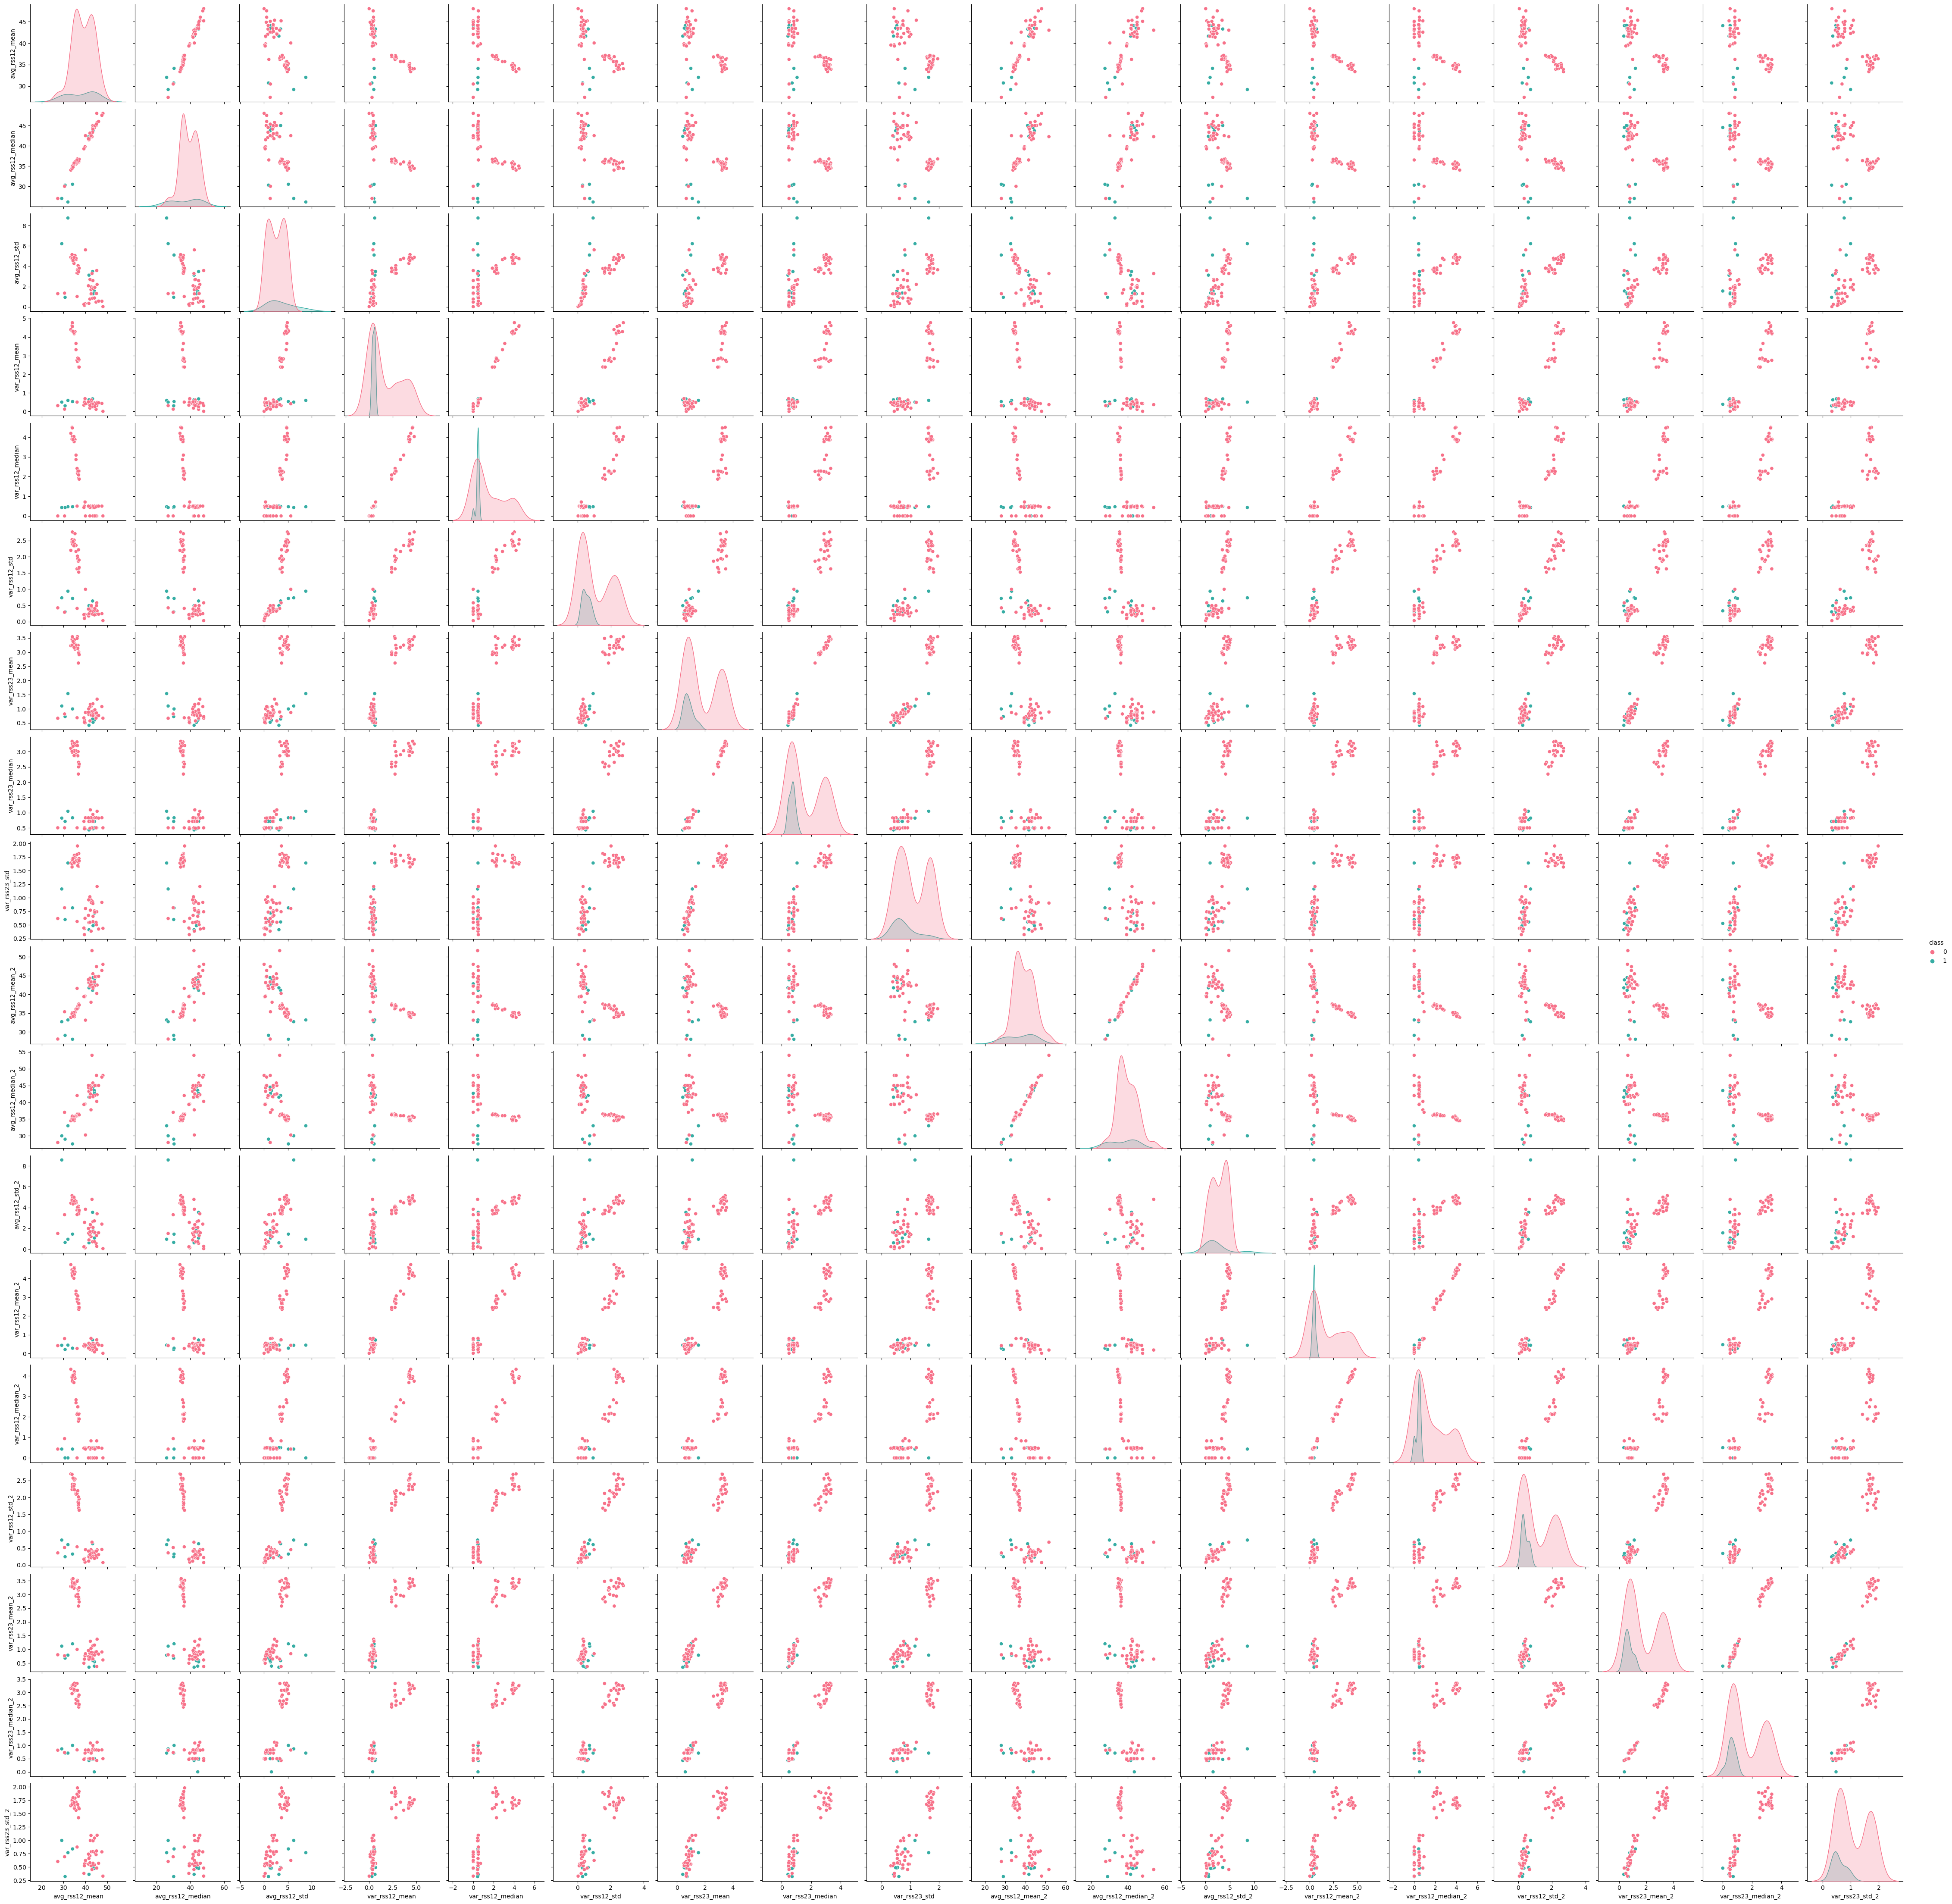

In [189]:
print("Scatter Plot for Split columns: ")

def scatter_plots_for_first6cols(parted_data):
    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std',
            'avg_rss12_mean_2', 'avg_rss12_median_2','avg_rss12_std_2',
            'var_rss12_mean_2','var_rss12_median_2','var_rss12_std_2',
            'var_rss23_mean_2','var_rss23_median_2','var_rss23_std_2']
    
    sn.pairplot(parted_data,vars=column,hue="class",diag_kind='kde',palette='husl')
    plt.show()
    
scatter_plots_for_first6cols(parted_data)

## Note: Scrrenshot of above 18*18 graph in case above execution takes time.

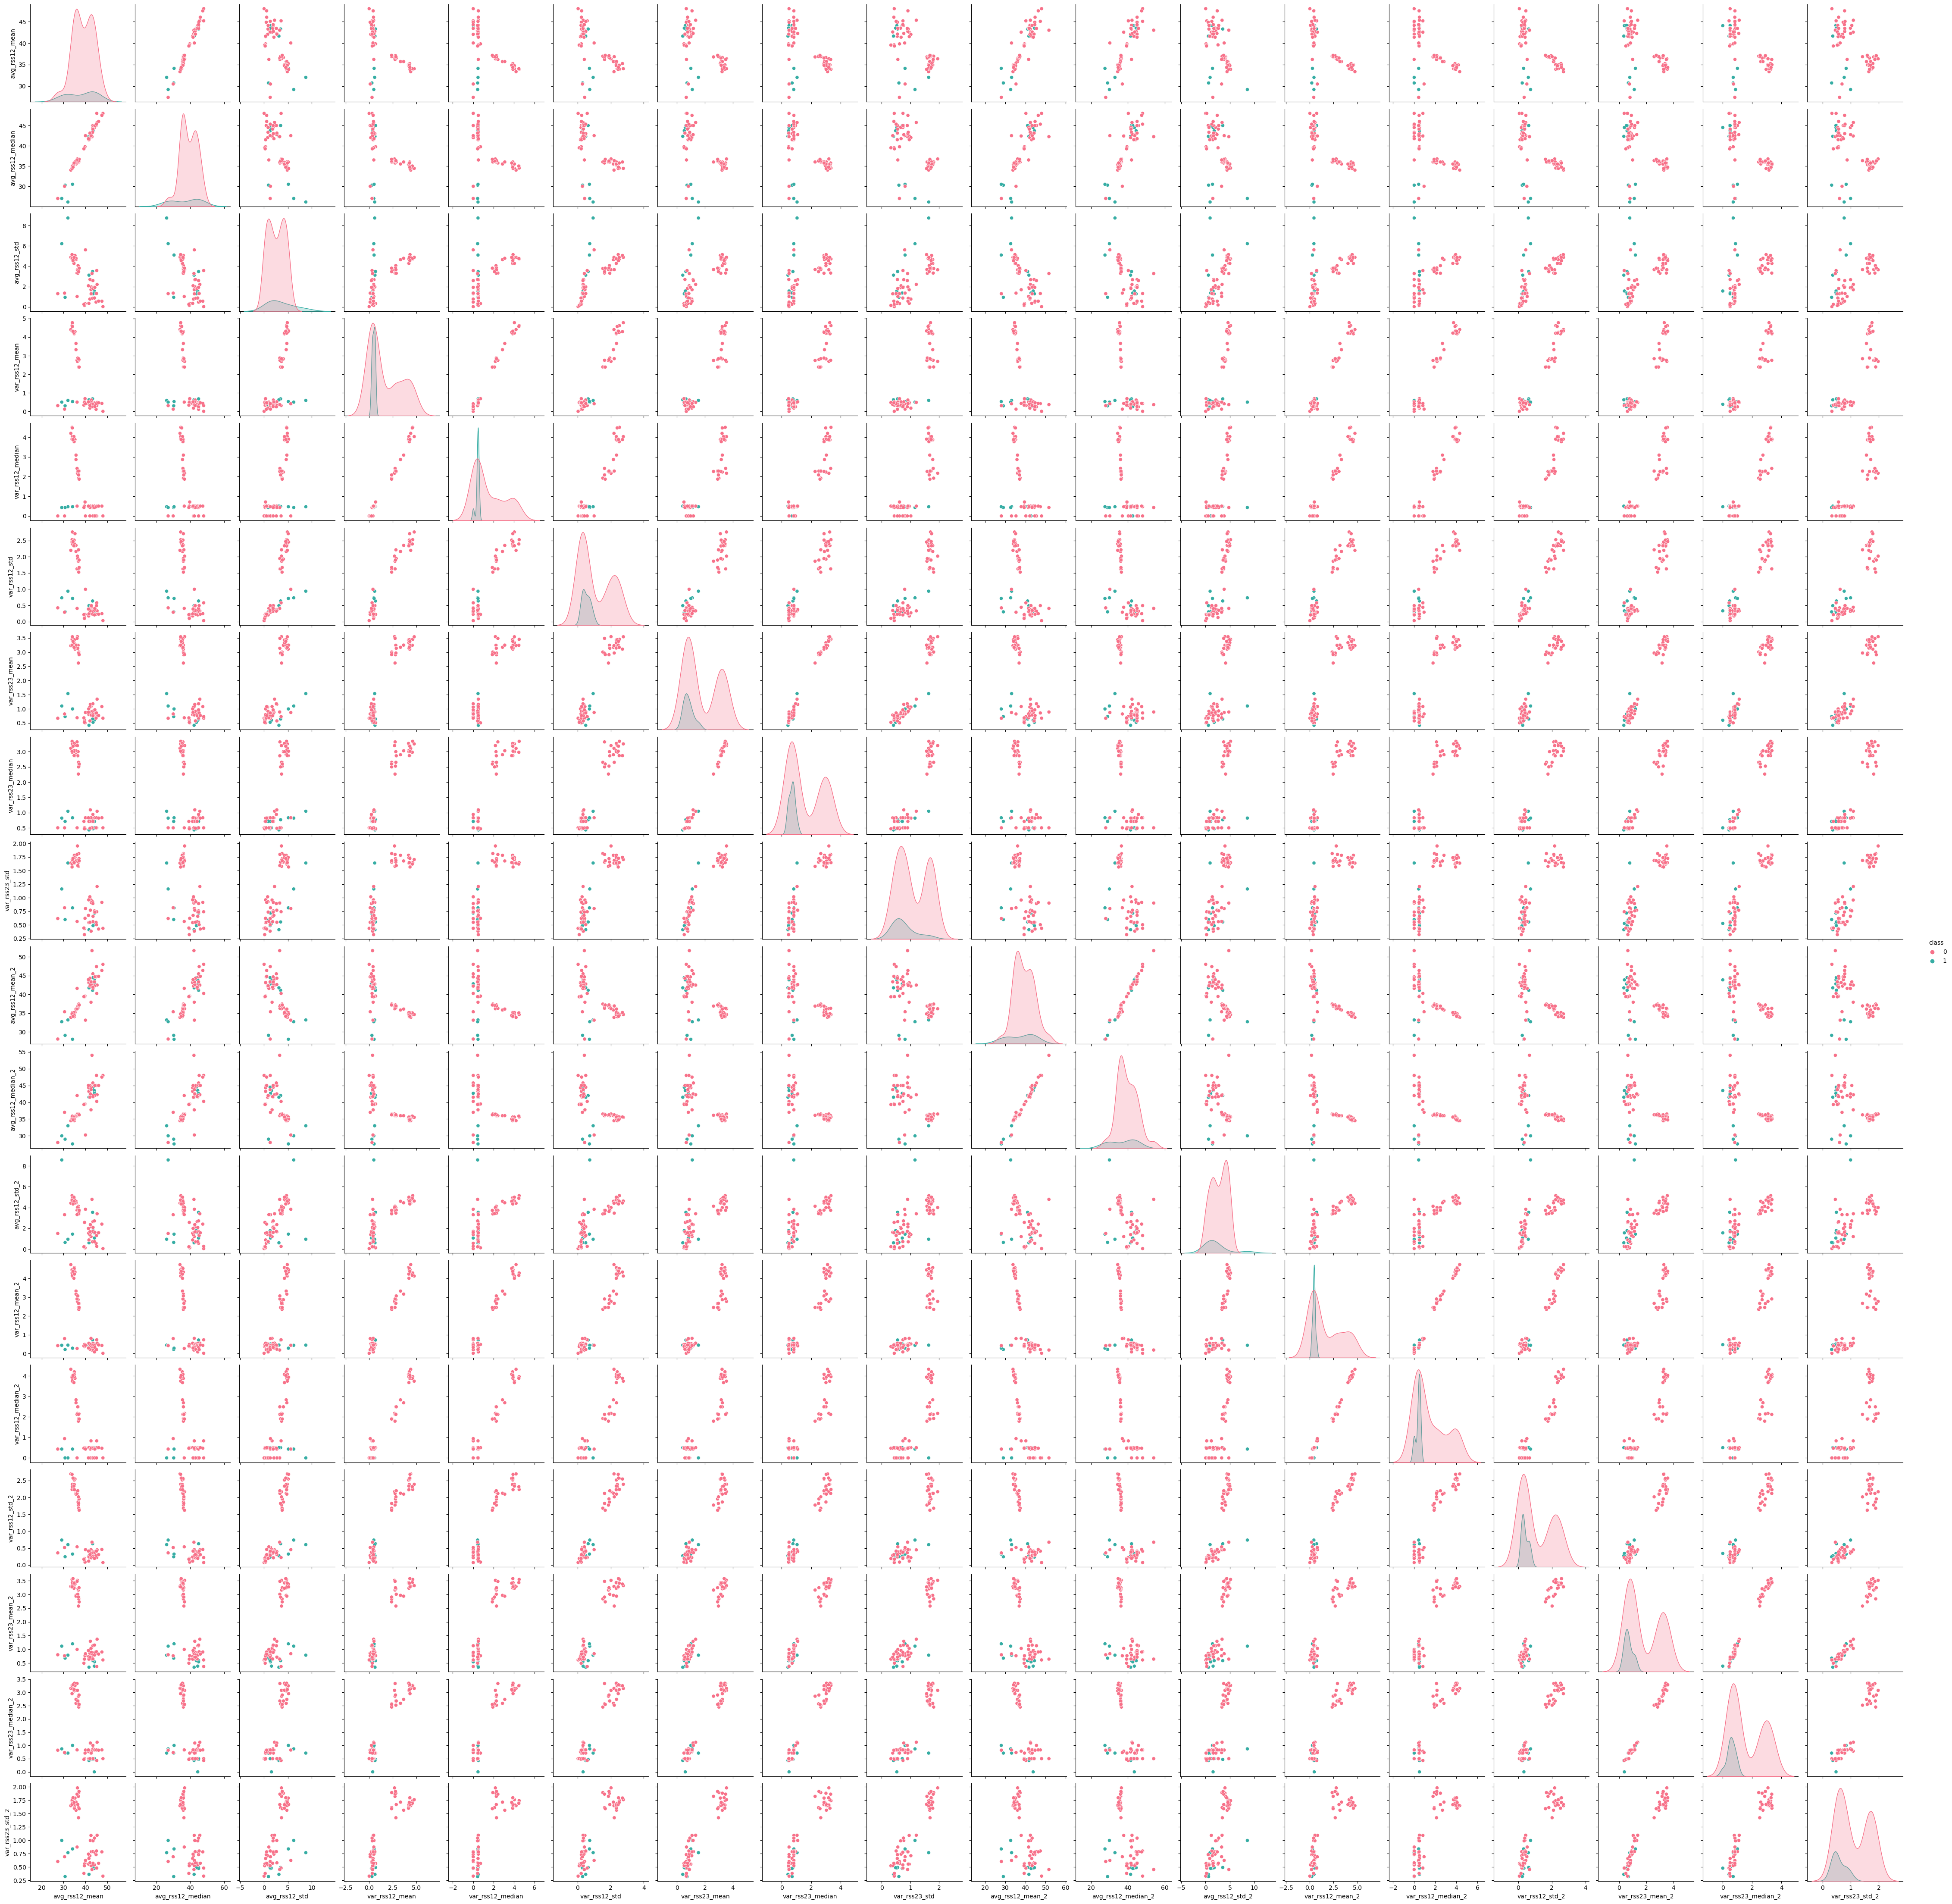

<font color='blue'>
There is only a little difference (not much) in the scatter plot before splitting the time series and after splitting the time series. As we can see even after splitting the data, the mean , median, standard deviation has varied only by little value. We can say that data samples are nearly uniformly concentrated, so that even splitting data, not much changes are observed.
</font>

#### iii. Time Series Segments

In [190]:
# function to split features into l=1,2...20

def split_training_binary(l):
    data=dict()
    for i,paths in enumerate(trainfile_paths):
        df=pd.read_csv(paths, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')     
        data[i]=df
    datatrain = {}
    ts_range=np.arange(0,6,1)
    split = int(480 / l);
    for i,path in enumerate(trainfile_paths): 
        values = data[i]
        trainlist = []
        df = pd.DataFrame(values)
        df=df.drop(['time'],axis=1)
        begin = 0;
        stop = split
        l_range=np.arange(1,l+1,1)
        for j,x in enumerate(l_range):
            if (split < 481):    
                df=df.loc[begin:stop]
                
                meandf = df.mean()
                mediandf = df.median()
                stddf = df.std()
                quant25 = df.quantile(0.25)
                quant75 = df.quantile(0.75)
                for y,k in enumerate(ts_range):     
                    trainlist.append(meandf[k])
                    trainlist.append(mediandf[k])
                    trainlist.append(stddf[k])
                    
        begin = stop
        stop = begin + split
        datatrain[i] = trainlist

    datatrain = pd.DataFrame.from_dict(datatrain, orient='index')
    return datatrain


##### p-values of logistic regression parameters in each model from L=1,2..20.
Note: The column names avg_rss12_mean,avg_rss12_median etc are replaced as feature0, feature2 for simplicity.
Note: Since there are large number of features, first 5 feature's p-value for each model is shown.

In [191]:

# calculate p-values
print("\n----------p-values-----------------")
l_splits=np.arange(1,21,1)
max_accuracy_before_prunning=0
best_l_before_prunning=1
max_val=0
for i,l in enumerate(l_splits):
    df=split_training_binary(l)
    row=df.shape[0]
    col=df.shape[1]
    class_val=[]
    
    for i1,val in enumerate(df.iterrows()):
        if i1<9:
            class_val.append(1)
        else:
            class_val.append(0)
            
    df['class']=class_val
    X_train=df.iloc[:,:(col-2)]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    Y_train=(df['class'])
    
    col_names=[]
    colrange=np.arange(0,len(df.columns),1)
    for i,colid in enumerate(colrange):
        col_names.append("feature"+str(colid))
        
    tmp_df=df
    tmp_df.columns = col_names
    tmp_df['CLASS']=class_val
    
    #print(df)
    formula = 'CLASS ~ feature0 + feature1 + feature2 + feature3 + feature4'
    model1 = smf.glm(formula = formula, data=tmp_df, family=sm.families.Binomial())
    result1= model1.fit(maxiter=5)
    
    print("\n------------------L : ",l,"-----------------------------------")
    print(result1.pvalues)
    
    


----------p-values-----------------

------------------L :  1 -----------------------------------
Intercept    0.453699
feature0     0.106688
feature1     0.139961
feature2     0.039459
feature3     0.148268
feature4     0.368342
dtype: float64

------------------L :  2 -----------------------------------
Intercept    0.882858
feature0     0.959983
feature1     0.834907
feature2     0.032394
feature3     0.210142
feature4     0.420214
dtype: float64

------------------L :  3 -----------------------------------
Intercept    0.533825
feature0     0.392917
feature1     0.483440
feature2     0.022568
feature3     0.170898
feature4     0.348762
dtype: float64

------------------L :  4 -----------------------------------
Intercept    0.131238
feature0     0.348064
feature1     0.462713
feature2     0.033549
feature3     0.087235
feature4     0.184349
dtype: float64

------------------L :  5 -----------------------------------
Intercept    0.100076
feature0     0.275999
feature1     0.369862

##### Applying Logistic Regression on each model-split without prunning

In [192]:

print("Applying logistic regression & 5-fold cross-validation  without pruning , for binary Classification")
print("\nL models and their p values and accuracies\n")
def logistic_regression_without_prunning():
    l_splits=np.arange(1,21,1)
    max_accuracy_before_prunning=0
    best_l_before_prunning=1
    max_val=0
    for i,l in enumerate(l_splits):
        df=split_training_binary(l)
        row=df.shape[0]
        col=df.shape[1]
        class_val=[]
        for i1,val in enumerate(df.iterrows()):
            if i1<9:
                class_val.append(1)
            else:
                class_val.append(0)
        df['class']=class_val
        X_train=df.iloc[:,:(col-2)]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        Y_train=df['class']
        
        
        logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=sys.maxsize, fit_intercept=True,random_state=None,solver='lbfgs')
        logistic_reg_fit=logistic_reg.fit(X_train,Y_train)
        
     
        accuracy_per_fold=cross_val_score(logistic_reg, X_train, Y_train,cv=5)
        
        accuracy_fullmodel=accuracy_per_fold.mean()
        
        feature_prunning = RFECV(logistic_reg, step = 1, cv=5).fit(X_train,Y_train)
        feat=feature_prunning.n_features_
        
        if(accuracy_fullmodel>max_accuracy_before_prunning):
            best_l_before_prunning=l
            max_accuracy_before_prunning=accuracy_fullmodel
            max_val=feat
            
            
        
        print("L:",l,"P value (no of features)",feat , " Acuracy:",accuracy_fullmodel)
        
        
    table=Texttable()
    table.add_rows([['Max Accuracy','Best L','P'],[max_accuracy_before_prunning,best_l_before_prunning,max_val]])
    print("\nBest (L,p) pair with accuracy (as it has highest acuuracy value) \n",table.draw())
    return best_l_before_prunning,max_accuracy_before_prunning

best_l_before_prunning,max_accuracy_before_prunning=logistic_regression_without_prunning()

Applying logistic regression & 5-fold cross-validation  without pruning , for binary Classification

L models and their p values and accuracies

L: 1 P value (no of features) 1  Acuracy: 0.8846153846153847
L: 2 P value (no of features) 6  Acuracy: 0.9131868131868132
L: 3 P value (no of features) 8  Acuracy: 0.856043956043956
L: 4 P value (no of features) 10  Acuracy: 0.7857142857142858
L: 5 P value (no of features) 1  Acuracy: 0.8131868131868132
L: 6 P value (no of features) 1  Acuracy: 0.7417582417582418
L: 7 P value (no of features) 2  Acuracy: 0.6824175824175824
L: 8 P value (no of features) 2  Acuracy: 0.5758241758241758
L: 9 P value (no of features) 1  Acuracy: 0.5483516483516484
L: 10 P value (no of features) 1  Acuracy: 0.49120879120879113
L: 11 P value (no of features) 1  Acuracy: 0.5175824175824176
L: 12 P value (no of features) 1  Acuracy: 0.4593406593406593
L: 13 P value (no of features) 1  Acuracy: 0.4736263736263736
L: 14 P value (no of features) 1  Acuracy: 0.473626373626

##### Finding significant features in the models using best L

In [193]:
def logistic_regression_pvalues(best_l_before_prunning):
    l_score = []
    significant_cols=[]
    df=split_training_binary(best_l_before_prunning)
    names=df.columns
    row=df.shape[0]
    col=df.shape[1]
    class_val=[]
    significant_features=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
            
    df['class']=class_val
    
    X_train=df.iloc[:,:(col-2)]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    Y_train=df['class']

    logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')
    feature_prunning = RFECV(logistic_reg, step = 1, cv = 5).fit(X_train,Y_train)
    
    support_range=np.arange(0,len(feature_prunning.support_),1)
    ranking_range=np.arange(0,len(feature_prunning.ranking_),1)
    ranking=feature_prunning.ranking_
    
    
    print("After using Recursive Feature Elimination we have found that the following features for L=2 model are significant and highly ranked\n")
    for i,supp in enumerate(support_range):
        if feature_prunning.support_[supp] == True:
            print("Significant Feature Index : ",i," Ranking: ",ranking[i])
            significant_features.append(i)
    print("\nTherefore selected features indices are: ",significant_features)
    return significant_features
 

significant_features=logistic_regression_pvalues(best_l_before_prunning)

After using Recursive Feature Elimination we have found that the following features for L=2 model are significant and highly ranked

Significant Feature Index :  12  Ranking:  1
Significant Feature Index :  17  Ranking:  1
Significant Feature Index :  19  Ranking:  1
Significant Feature Index :  26  Ranking:  1
Significant Feature Index :  29  Ranking:  1
Significant Feature Index :  30  Ranking:  1

Therefore selected features indices are:  [12, 17, 19, 26, 29, 30]


##### Applying Logistic Regression on each model-split with prunning(using only significant feature's indices which we found above with best L

In [194]:

def logistic_refitting_significantcols(significant_features):
    l_splits=[2]
    max_accuracy_after_prunning=0
    best_l_after_prunning=1
    for i,l in enumerate(l_splits):

        df=split_training_binary(l)
        
        if (len(df.columns)>=max(significant_features)):
            row=df.shape[0]
            col=df.shape[1]

            class_val=[]
            for i,val in enumerate(df.iterrows()):
                if i<9:
                    class_val.append(1)
                else:
                    class_val.append(0)
            df['class']=class_val
            X_train=df.iloc[:,significant_features]
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            Y_train=df['class']
            logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')
            logistic_reg_fit=logistic_reg.fit(X_train,Y_train)
            accuracy_per_fold=cross_val_score(logistic_reg, X_train, Y_train,cv=5)
            accuracy_fullmodel=accuracy_per_fold.mean()
            if(accuracy_fullmodel>max_accuracy_after_prunning):
                best_l_after_prunning=l
                max_accuracy_after_prunning=accuracy_fullmodel
    table=Texttable()
    table.add_rows([['Max Accuracy','Best L'],[max_accuracy_after_prunning,best_l_after_prunning]])
    print("\nBest L and Accuracy after Applying Logistic Regression with Cross Validation on L=2 model with significant features\n",table.draw())
    return best_l_after_prunning,max_accuracy_after_prunning


best_l_after_prunning , max_accuracy_after_prunning = logistic_refitting_significantcols(significant_features)
print("We can see that accuracy has increased with removing insignicant features.")


Best L and Accuracy after Applying Logistic Regression with Cross Validation on L=2 model with significant features
 +--------------+--------+
| Max Accuracy | Best L |
+==============+========+
| 0.971        | 2      |
+--------------+--------+
We can see that accuracy has increased with removing insignicant features.


<font color='blue'>
The right way of performing cross validation is: <br>
During cross-validation, we make feature selection a part of our process while training our model. Also,it will only be done on training data. <br>
The wrong way of performing cross validation is: <br>
When we perform the cross validation models on the test set directly (Because this makes the model lose the generalization)
Also, when we select features using all of our dataset and when it is done independently of cross validation method   
</font>

#### iv. Confusion Matrix


---------  P-values and Coefficients --------------

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                   69
Model:                            GLM   Df Residuals:                       64
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.0139
Date:                Fri, 03 Mar 2023   Deviance:                       8.0278
Time:                        19:50:14   Pearson chi2:                     7.48
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4822
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

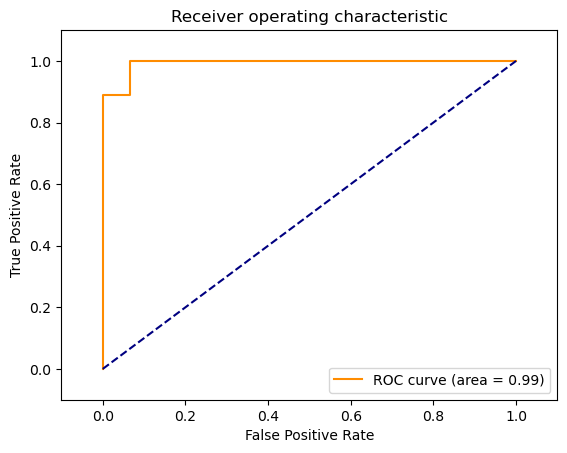

In [195]:
pd.options.mode.chained_assignment = None 
def logit_pvalues_coeff(significant_features,best_l):
    print("\n---------  P-values and Coefficients --------------\n")
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)

    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')
    rfecv = RFECV(estimator=logistic, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv = rfecv.fit(X_train,Y_train)
    traindata = df.iloc[:,significant_features]
    col_names=[]
    colrange=np.arange(0,len(significant_features),1)
    for i,colid in enumerate(colrange):
        col_names.append("feature"+str(colid))
        

    traindata.columns = col_names
    traindata["CLASS"] = class_val

    #print(traindata)
    formula = 'CLASS ~ feature0 + feature1+ feature3 + feature4 + feature5'
    model = smf.glm(formula = formula, data=traindata, family=sm.families.Binomial())
    result= model.fit(maxiter=5)
    
    print(result.summary())
    return result,traindata,Y_train

    
def confusionMatrix(best_l,significant_features,result,traindata,Y_train):
    print("\n\n---------  Confusion Matrix --------------\n")
    print("\nThe confusion matrix of training dataset for best l = ",best_l,"\n")
    Y_pred = result.predict(traindata)
    cm = confusion_matrix(Y_train,Y_pred>0.5)
    TP = cm[1][1]
    FP = cm[0][1]
    TN = cm[0][0]
    FN = cm[1][0]
    print(cm)
    print("\n")
    print("TRUE POSITIVE: ",TP,"\n")
    print("FALSE POSITIVE: ",FP,"\n")
    print("TRUE NEGATIVE: ",TN,"\n")
    print("FALSE NEGATIVE: ",FN,"\n")
    return Y_pred


def roc_auc(Y_pred,best_l,significant_features):
    print("\n\n---------  ROC CURVE --------------\n")
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)

    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')
    rfecv = RFECV(estimator=logistic, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv = rfecv.fit(X_train,Y_train)
    
    fpr, tpr, thresholds = roc_curve(Y_train,Y_pred)
    print("\nThe ROC curve for l = ",best_l," is as follows, and the AUC = %.2f"% auc(fpr,tpr))
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    
result,traindata,Y_train=logit_pvalues_coeff(significant_features,best_l_after_prunning)
Y_pred=confusionMatrix(best_l_after_prunning,significant_features,result,traindata,Y_train)
roc_auc(Y_pred,best_l_after_prunning,significant_features)

#### v. Test Classifier

##### We splitted training data and found best accuracy for L=2.  Now splitting test data with L=2 with all time features. (mean,median,std) (without pruning)

In [196]:
def split_testing_binary(l):
    data=dict()
    for i,paths in enumerate(testfile_paths):
        df=pd.read_csv(paths, sep=' |,', names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'], skiprows=5,usecols=range(7),engine='python')     
        
        data[i]=df
    datatest = {}
    ts_range=np.arange(0,6,1)
    split = int(480 / l);
    for i,path in enumerate(testfile_paths): 
        values = data[i]
        testlist = []
        df = pd.DataFrame(values)
        df=df.drop(['time'],axis=1)
        begin = 0
        stop = split
        l_range=np.arange(1,l+1,1)
        for j,x in enumerate(l_range):
            if (split < 481):    
                df=df.loc[begin:stop]
                meandf = df.mean()
                mediandf = df.median()
                stddf = df.std()
                for y,k in enumerate(ts_range):
                    testlist.append(meandf[k])
                    testlist.append(mediandf[k])
                    testlist.append(stddf[k])
                    
        begin = stop
        stop = begin + split
        datatest[i] = testlist

    datatest = pd.DataFrame.from_dict(datatest, orient='index')
    return datatest

In [197]:
def logistic_regression_testing():
    score=[]
    l_splits=[2]
    max_accuracy_test=0
    best_l_before_prunning=1
    for i,l in enumerate(l_splits):
        df=split_testing_binary(l)
        row=df.shape[0]
        col=df.shape[1]
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<4:
                class_val.append(1)
            else:
                class_val.append(0)
        df['class']=class_val
        X_test=df.iloc[:,:(col-2)]
        scaler = StandardScaler()
        X_test = scaler.fit_transform(X_test)
        Y_test=df['class']
        logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')#use LogisticRegression to predict the value
        logistic_reg_fit=logistic_reg.fit(X_test,Y_test)
        accuracy_per_fold=cross_val_score(logistic_reg, X_test, Y_test,cv=4)
        accuracy_fullmodel=accuracy_per_fold.mean()
        if(accuracy_fullmodel>max_accuracy_test):
            score.append(accuracy_fullmodel)
            best_l_before_prunning=l
            max_accuracy_test=accuracy_fullmodel
    table=Texttable()
    table.add_rows([['Max Accuracy','Best L'],[max_accuracy_test,best_l_before_prunning]])
    print("\nApplying Logistic Regression with Cross Validation on each L-2 model without prunning\n",table.draw())
    
    print("\nTherefore the training and testing crossvalidation accuracy before pruning are: \n")
    print("Training accuracy: ",max_accuracy_before_prunning)
    print("Testing accuracy: ",max_accuracy_test)
    return best_l_before_prunning,max_accuracy_test

best_l_before_prunning,max_accuracy_testing=logistic_regression_testing()


Applying Logistic Regression with Cross Validation on each L-2 model without prunning
 +--------------+--------+
| Max Accuracy | Best L |
+==============+========+
| 0.950        | 2      |
+--------------+--------+

Therefore the training and testing crossvalidation accuracy before pruning are: 

Training accuracy:  0.9131868131868132
Testing accuracy:  0.95


#####  Now test accuracy with best L=2 and with featuress indices :  [12, 17, 19, 26, 29, 30]   (with pruning)

In [198]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

def testing_regression(significant_features):
    l_splits=[2]
    max_a=0
    best_l=1
    for i,l in enumerate(l_splits):

        df=split_testing_binary(l)
        
        if (len(df.columns)>=max(significant_features)):
            row=df.shape[0]
            col=df.shape[1]

            class_val=[]
            for i,val in enumerate(df.iterrows()):
                if i<4:
                    class_val.append(1)
                else:
                    class_val.append(0)
            df['class']=class_val
            X_test=df.iloc[:,significant_features]
            scaler = StandardScaler()
            X_test = scaler.fit_transform(X_test)
            Y_test=df['class']
            logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')
            logistic_reg_fit=logistic_reg.fit(X_test,Y_test)
            accuracy_per_fold=cross_val_score(logistic_reg, X_test, Y_test,cv=5)
            accuracy_fullmodel=accuracy_per_fold.mean()
            if(accuracy_fullmodel>max_a):
                best_l=l
                max_a=accuracy_fullmodel
    table=Texttable()
    table.add_rows([['Max Accuracy','Best L'],[max_a,best_l]])
    print("\nBest L and Accuracy after Applying Logistic Regression with Cross Validation on L=2 model with significant features\n",table.draw())
    return best_l,max_a


testing_l , test_accuaracy_pruning = testing_regression(significant_features)

print("\nTherefore the training and testing crossvalidation accuracy after pruning are: \n")
print("Training accuracy: ",max_accuracy_after_prunning)
print("Testing accuracy: ",test_accuaracy_pruning)



Best L and Accuracy after Applying Logistic Regression with Cross Validation on L=2 model with significant features
 +--------------+--------+
| Max Accuracy | Best L |
+==============+========+
| 0.950        | 2      |
+--------------+--------+

Therefore the training and testing crossvalidation accuracy after pruning are: 

Training accuracy:  0.9714285714285715
Testing accuracy:  0.95


<font color='blue'> The test accuracy is above 90%, so the model is performing well on test data. </font>

#### vi. Separation

<font color='blue'>Yes, mostly the classes are well separated and the model is very unstable. Also, the plot below gives evidence that classes are well separated and the data is imbalanced with few labels of bending activites and majority labels of non bending activites. </font>

In [199]:
test_data=split_testing_binary(2)
class_val=[]
for i,val in enumerate(test_data.iterrows()):
    if i<4:
        class_val.append(1)
    else:
        class_val.append(0)
test_data['class']=class_val
column=significant_features
selected_data=test_data[column]
selected_data['class']=class_val
plt.figure(figsize=(13,13))
sn.pairplot(data=selected_data,vars=column,hue='class')


<Figure size 1300x1300 with 0 Axes>

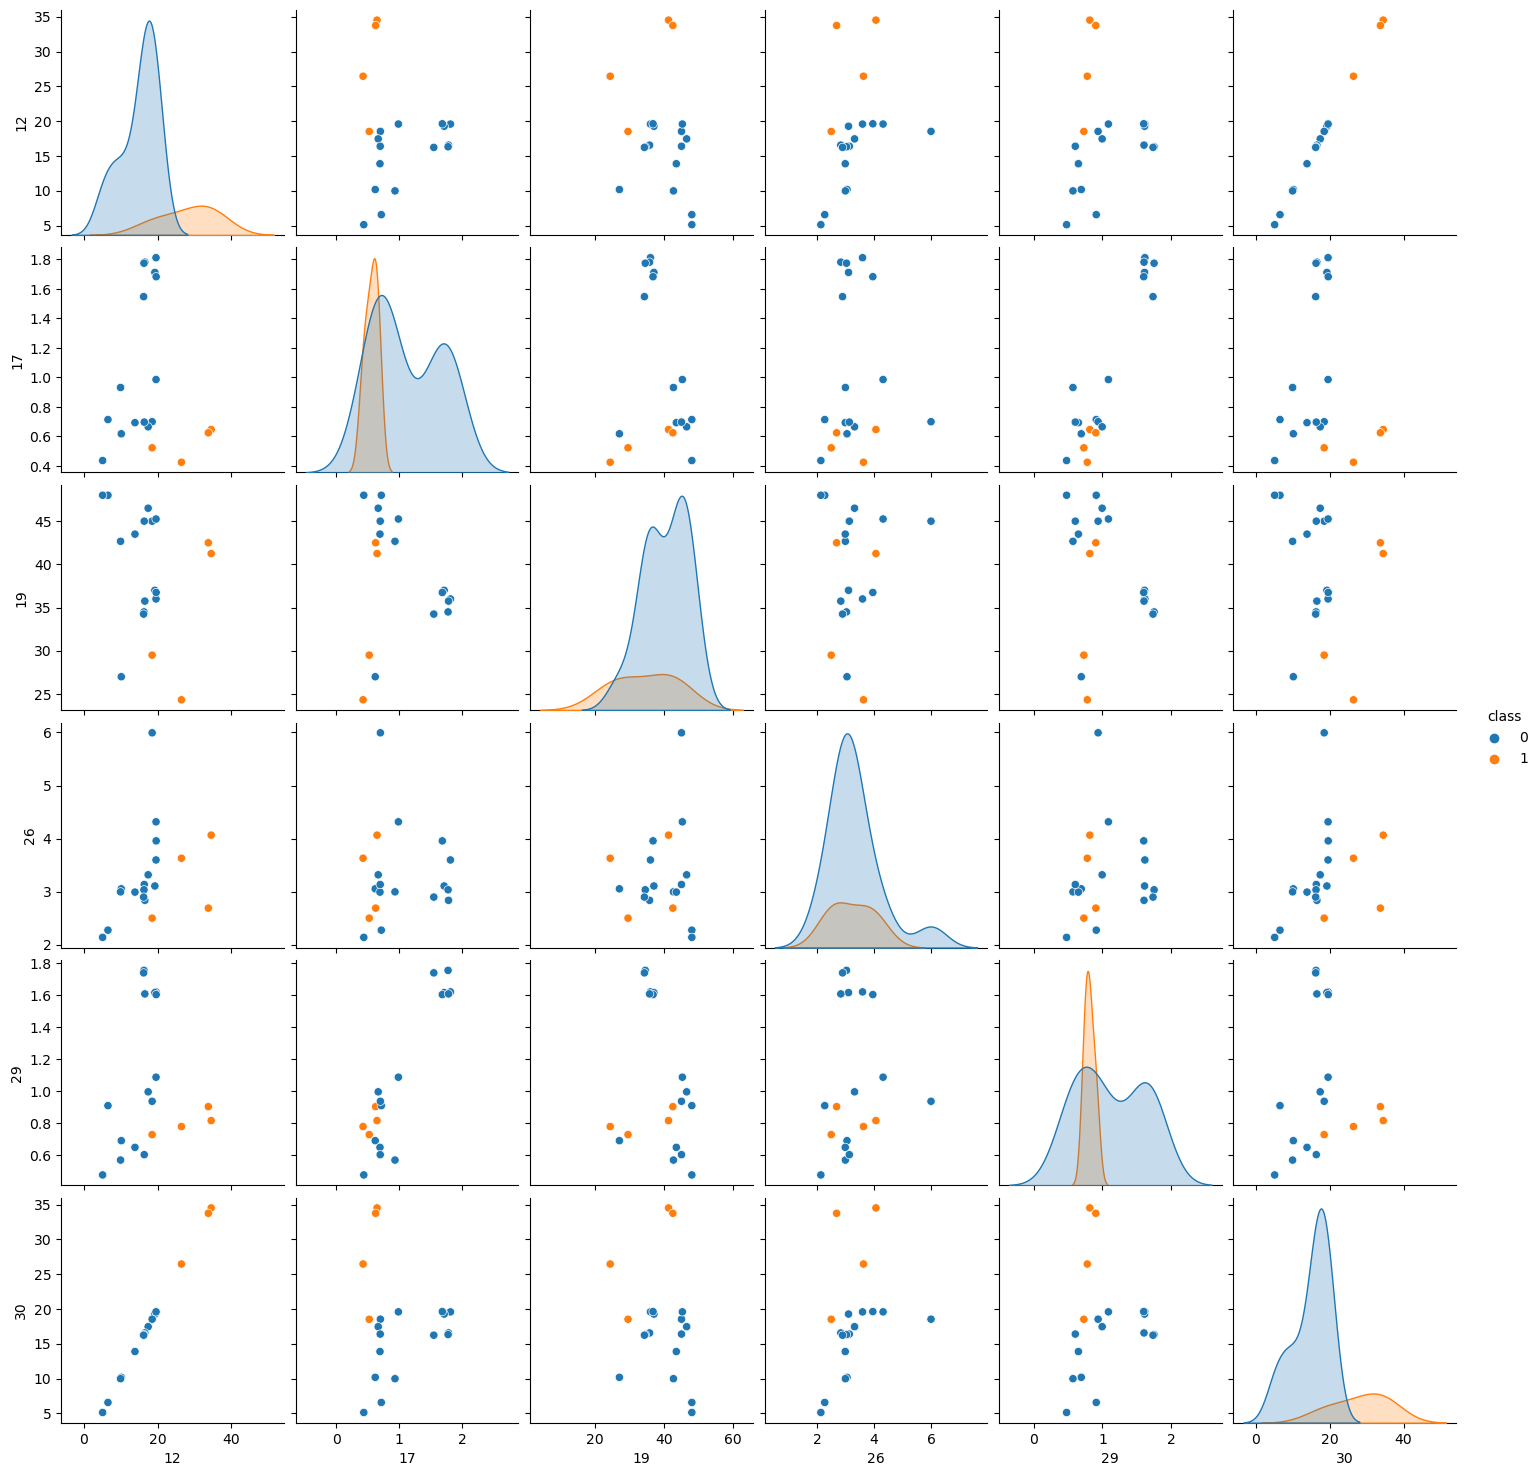

In [200]:
plt.show()


#### vii. Imbalance

<font color='blue'>From the confusion matrix calculated in part iv), we can see there's tn=60 "not bending", but only tp=8 'bending'. So classes are imbalanced. So here I'm going to  build a logistic regression model based on case-control sampling. <font>



--------- Case Control Sampling--------------

Resampled dataset shape Counter({1: 60, 0: 60})


---------  Confusion Matrix --------------

[[15  0]
 [ 0  4]]


TP:  4 

FP:  0 

TN:  15 

FN:  0 



---------  ROC CURVE --------------


The ROC curve is as follows, and the AUC = 0.97


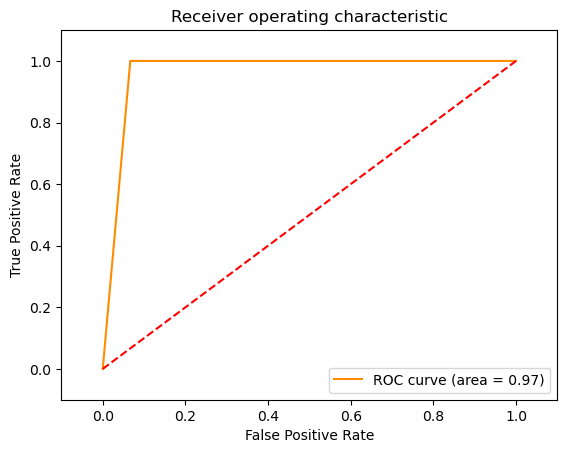

In [201]:
def case_sampling(significant_features,best_l):
    print("\n\n--------- Case Control Sampling--------------\n")
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)

    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    sm1 = SMOTE(random_state=42)
    X_res, Y_res = sm1.fit_resample(X_train,Y_train)
    X_res_train = pd.DataFrame(X_res)
    Y_res_train = pd.DataFrame(Y_res)
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')
    rfecv = RFECV(estimator=logistic, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv = rfecv.fit(X_res_train,Y_res_train)  
    logistic=logistic.fit(X_res_train.iloc[:,significant_features],Y_res_train)
    Y_predict=logistic.predict(X_res_train.iloc[:,significant_features])
    print("Resampled dataset shape %s" % Counter(Y_res)) 
    return Y_res_train,Y_predict


    
def confusionMatrix(Y_train,Y_predict,best_l):
    print("\n\n---------  Confusion Matrix --------------\n")
    
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    
    class_val=[]
    for i,val in enumerate(df1.iterrows()):
        if i<4:
            class_val.append(1)
        else:
            class_val.append(0)
    df1['class']=class_val
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='lbfgs')
    logistic=logistic.fit(X_train,Y_train)
    Y_predict=logistic.predict(X_test)
    
    cm = confusion_matrix(Y_test,Y_predict>0.5)
    TP = cm[1][1]
    FP = cm[0][1]
    TN = cm[0][0]
    FN = cm[1][0]
    print(cm)
    print("\n")
    print("TP: ",TP,"\n")
    print("FP: ",FP,"\n")
    print("TN: ",TN,"\n")
    print("FN: ",FN,"\n")


    
def roc_auc(Y_pred,best_l,significant_features):
    print("\n\n---------  ROC CURVE --------------\n")
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    
    class_val=[]
    for i,val in enumerate(df1.iterrows()):
        if i<4:
            class_val.append(1)
        else:
            class_val.append(0)
    df1['class']=class_val
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    sm1 = SMOTE(random_state=42)
    X_res, Y_res = sm1.fit_resample(X_train.iloc[:,significant_features],Y_train)
    X_res_train = pd.DataFrame(X_res)
    Y_res_train = pd.DataFrame(Y_res)
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')
    logistic=logistic.fit(X_res_train,Y_res_train)
    Y_predict=logistic.predict(X_test.iloc[:,significant_features])
    

    fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
    print("\nThe ROC curve is as follows, and the AUC = %.2f"% auc(fpr,tpr))
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='red',  linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


Y_train,Y_predict=case_sampling(significant_features,best_l_after_prunning)
confusionMatrix(Y_train,Y_predict,best_l_after_prunning)
roc_auc(Y_pred,best_l_after_prunning,significant_features)

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [202]:
def logistic_l1penalty():
    tmp=0
    maxaccuracy_for_objective_func=0
    best_objective_function=0.1
    l_splits=np.arange(1,21,1)
    best_l=1
    for l in l_splits:
        df = split_training_binary(l)
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<9:
                class_val.append(1)
            else:
                class_val.append(0)

        df['class']=class_val
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        c_range=np.arange(10, 101, 10)
        tmp=0
        tmp_c=0
        
        
        
        for i,c in enumerate(c_range):
            c=c/1000 ##Objective Function
            L1_Penalty_Logistic=LogisticRegression(C=c,random_state=None,solver='liblinear',penalty='l1')
            L1_Penalty_Logistic.fit(X_train,Y_train)
            cross_validation_result=cross_val_score(L1_Penalty_Logistic,X_train,Y_train,cv=5)
            cross_validation_accuracy=cross_validation_result.mean()
            if(tmp<cross_validation_accuracy):
                tmp=cross_validation_accuracy
                tmp_c=c
            
            if(cross_validation_accuracy>maxaccuracy_for_objective_func):
                maxaccuracy_for_objective_func=cross_validation_accuracy
                best_objective_function=c
                best_l=l
                

        
        print("L:",l," accuracy: ",tmp," C(Objective Function): ",tmp_c)
            
    table=Texttable()
    table.add_rows([['Max Accuracy','Best C(Objective Function)','Best L'],[maxaccuracy_for_objective_func,best_objective_function,best_l]])
    #table.add_rows([['Max Accuracy','Best L'],[maxaccuracy_for_objective_func,best_l]])
    
    print("\nApplying Logistic Regression with L1 Penalty and  with Cross Validation on each model-split\n",table.draw())
    return maxaccuracy_for_objective_func


maxaccuracy_for_objective_func=logistic_l1penalty()

L: 1  accuracy:  0.9131868131868132  C(Objective Function):  0.07
L: 2  accuracy:  0.9417582417582417  C(Objective Function):  0.08
L: 3  accuracy:  0.9274725274725275  C(Objective Function):  0.05
L: 4  accuracy:  0.9285714285714285  C(Objective Function):  0.06
L: 5  accuracy:  0.9428571428571428  C(Objective Function):  0.1
L: 6  accuracy:  0.9428571428571428  C(Objective Function):  0.05
L: 7  accuracy:  0.9428571428571428  C(Objective Function):  0.05
L: 8  accuracy:  0.9428571428571428  C(Objective Function):  0.05
L: 9  accuracy:  0.9428571428571428  C(Objective Function):  0.05
L: 10  accuracy:  0.9428571428571428  C(Objective Function):  0.06
L: 11  accuracy:  0.9428571428571428  C(Objective Function):  0.1
L: 12  accuracy:  0.9428571428571428  C(Objective Function):  0.09
L: 13  accuracy:  0.9428571428571428  C(Objective Function):  0.1
L: 14  accuracy:  0.9285714285714285  C(Objective Function):  0.07
L: 15  accuracy:  0.9285714285714285  C(Objective Function):  0.07
L: 16  

#### ii. Comparison

In [203]:
print("for training:")
print("(Without Regularization) Max accuracy using p-values: ",max_accuracy_before_prunning)
print("\n(With Regularization) Max accuracy using L1-penalty in Logistic Regression: ",maxaccuracy_for_objective_func)
print("\nL1-penalty with variable selection is easier to implement")

for training:
(Without Regularization) Max accuracy using p-values:  0.9131868131868132

(With Regularization) Max accuracy using L1-penalty in Logistic Regression:  0.9428571428571428

L1-penalty with variable selection is easier to implement


<font color='blue'>The L-1 penalised Logistic Regression model is easier to implement because we just have to add one regularization parameter. The train accuracy for L1-penalised Logistic Regression model is much better than Logistic Regression. Hence, L1-penalised Logistic Regression model performs better for this dataset. </font>

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

##### Applying Logistic Regression for multilabelled training data using regularization with (L1 Penalty)

In [204]:
def logistic_l1penalty_multilabel():
    maxaccuracy_for_objective_func_multilabel=0
    best_objective_function=0.1
    l_splits=np.arange(1,21,1)
    best_l=1
    for l in l_splits:
        df = split_training_binary(l)
        for i,files in enumerate(trainfile_paths):
            
            if(('bending1' in files) or ('bending2' in files)):
                df.at[i,'class']=1
            elif('lying' in files):
                df.at[i,'class']=2
            elif('cycling' in files):
                df.at[i,'class']=3
            elif('sitting' in files):
                df.at[i,'class']=4
            elif('standing' in files):
                df.at[i,'class']=5
            elif('walking' in files):
                df.at[i,'class']=6
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        c_range=np.arange(10, 101, 10)
        tmp=0
        tmp_c=0
        for i,c in enumerate(c_range):
            c=c/1000 ##Objective Function
            L1_Penalty_Logistic=LogisticRegression(C=c,random_state=None,penalty='l1',solver='saga',multi_class="multinomial")
            L1_Penalty_Logistic.fit(X_train,Y_train)
            cross_validation_result=cross_val_score(L1_Penalty_Logistic,X_train,Y_train,cv=5)
            cross_validation_accuracy=cross_validation_result.mean()
            
            if(tmp<cross_validation_accuracy):
                tmp=cross_validation_accuracy
                tmp_c=c
            
            
            if(cross_validation_accuracy>maxaccuracy_for_objective_func_multilabel):
                maxaccuracy_for_objective_func_multilabel=cross_validation_accuracy
                best_objective_function=c
                best_l=l
                
        print("L:",l," accuracy: ",tmp)
                
    table=Texttable()
    table.add_rows([['Max Accuracy','Best C(Objective Function)','Best L', 'Train Error'],[maxaccuracy_for_objective_func_multilabel,best_objective_function,best_l,1-maxaccuracy_for_objective_func_multilabel]])
    print("\nApplying Logistic Regression for Multilabeled data with L1 Penalty and  with Cross Validation on each model-split\n",table.draw())
    return best_l,maxaccuracy_for_objective_func_multilabel,best_objective_function


best_l_multilabel_logistic,maxaccuracy_for_objective_func_multilabel_training,best_objective_function=logistic_l1penalty_multilabel()

L: 1  accuracy:  0.6813186813186813
L: 2  accuracy:  0.6956043956043956
L: 3  accuracy:  0.7406593406593406
L: 4  accuracy:  0.7395604395604395
L: 5  accuracy:  0.7549450549450549
L: 6  accuracy:  0.7395604395604396
L: 7  accuracy:  0.7109890109890109
L: 8  accuracy:  0.7120879120879121
L: 9  accuracy:  0.6978021978021978
L: 10  accuracy:  0.6978021978021978
L: 11  accuracy:  0.7120879120879121
L: 12  accuracy:  0.7263736263736265
L: 13  accuracy:  0.7120879120879121
L: 14  accuracy:  0.7120879120879121
L: 15  accuracy:  0.7120879120879121
L: 16  accuracy:  0.7120879120879121
L: 17  accuracy:  0.6835164835164835
L: 18  accuracy:  0.6978021978021978
L: 19  accuracy:  0.6978021978021978
L: 20  accuracy:  0.6835164835164835

Applying Logistic Regression for Multilabeled data with L1 Penalty and  with Cross Validation on each model-split
 +--------------+----------------------------+--------+-------------+
| Max Accuracy | Best C(Objective Function) | Best L | Train Error |
+==============

###### Finding Test error on Multilabelled data using Logistic Regression with Regularization (L1-penalty)

In [205]:
def logistic_l1penalty_multilabel_testing(best_l,best_objective_function):
    maxaccuracy_multilabel_testing=0
    best_objective_function=0.1
    minval=500000000
    acc=0
    
    l_splits=np.arange(1,21,1)
    best_l=1
    for l in l_splits:
        df = split_testing_binary(l)
    
        for i,files in enumerate(testfile_paths):
            if(('bending1' in files) or ('bending2' in files)):
                df.at[i,'class']=1
            elif('lying' in files):
                df.at[i,'class']=2
            elif('cycling' in files):
                df.at[i,'class']=3
            elif('sitting' in files):
                df.at[i,'class']=4
            elif('standing' in files):
                df.at[i,'class']=5
            elif('walking' in files):
                df.at[i,'class']=6
        col=df.shape[1]
        X_test = df.iloc[:,:(col-2)]
        Y_test = df.loc[:,'class']
        L1_Penalty_Logistic=LogisticRegression(random_state=None,penalty='l1',solver='saga',multi_class="multinomial")
        L1_Penalty_Logistic=L1_Penalty_Logistic.fit(X_test,Y_test)
        Y_predict=L1_Penalty_Logistic.predict(X_test)
        
        cross_validation_result=cross_val_score(L1_Penalty_Logistic,X_test,Y_test,cv=4)
        cross_validation_accuracy=cross_validation_result.mean()
        
        maxaccuracy_multilabel_testing=cross_validation_accuracy

        val=L1_Penalty_Logistic.score(X_test,Y_test)
        print("L :",l,"Test Error", 1-val)
        
        if((1-val)<minval):
            minval=1-val
            acc=val
            best_l=l
            Y_predict1=Y_predict
            Y_test1=Y_test
            X_test1=X_test
            maxaccuracy_multilabel_testing_1= maxaccuracy_multilabel_testing
            
            
        
            
        
        
    
    
    table=Texttable()
    table.add_rows([['Max Accuracy','Lowest Test Error','Best L'],[acc,minval,best_l]])
    print("\nApplying Logistic Regression for Multilabelled data L1 Penalty and  with Cross Validation on test data for best l\n",table.draw())
    #print("\nTest error: ",1-maxaccuracy_multilabel_testing)
    return best_l,maxaccuracy_multilabel_testing_1,Y_predict1,Y_test1,X_test1


best_l,maxaccuracy_for_objective_func_multilabel,Y_predict,Y_test,X_test= logistic_l1penalty_multilabel_testing(best_l_multilabel_logistic,best_objective_function)

#print(maxaccuracy_for_objective_func_multilabel)
#print(Y_predict)

L : 1 Test Error 0.052631578947368474
L : 2 Test Error 0.10526315789473684
L : 3 Test Error 0.1578947368421053
L : 4 Test Error 0.10526315789473684
L : 5 Test Error 0.052631578947368474
L : 6 Test Error 0.052631578947368474
L : 7 Test Error 0.052631578947368474
L : 8 Test Error 0.10526315789473684
L : 9 Test Error 0.1578947368421053
L : 10 Test Error 0.10526315789473684
L : 11 Test Error 0.1578947368421053
L : 12 Test Error 0.1578947368421053
L : 13 Test Error 0.1578947368421053
L : 14 Test Error 0.1578947368421053
L : 15 Test Error 0.1578947368421053
L : 16 Test Error 0.10526315789473684
L : 17 Test Error 0.1578947368421053
L : 18 Test Error 0.1578947368421053
L : 19 Test Error 0.1578947368421053
L : 20 Test Error 0.1578947368421053

Applying Logistic Regression for Multilabelled data L1 Penalty and  with Cross Validation on test data for best l
 +--------------+-------------------+--------+
| Max Accuracy | Lowest Test Error | Best L |
+==============+===================+========+
| 


Confusion Matrix for Multilabel Logistic Regression: 

[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [1 0 3 0 0 0]
 [0 0 0 2 2 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 3]]

ROC Curve


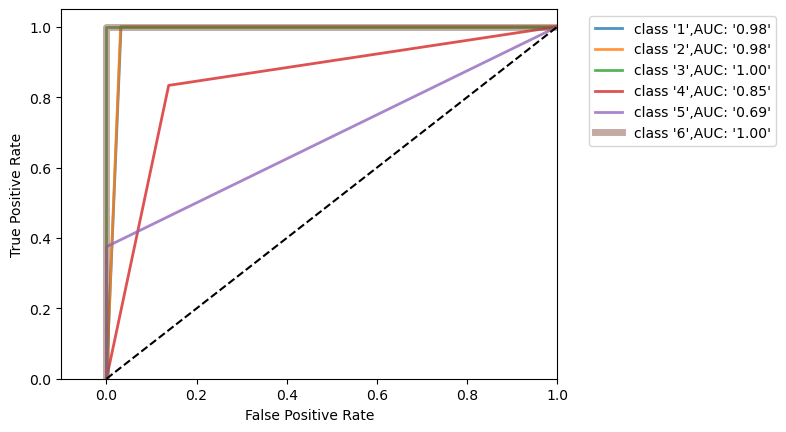

In [206]:
def confusion_matrix_logistic_multilabel(best_l,c,Y_predict,Y_test):
    print("\nConfusion Matrix for Multilabel Logistic Regression: \n")
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)

    for i,files in enumerate(trainfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df.at[i,'class']=1
        elif('lying' in files):
            df.at[i,'class']=2
        elif('cycling' in files):
            df.at[i,'class']=3
        elif('sitting' in files):
            df.at[i,'class']=4
        elif('standing' in files):
             df.at[i,'class']=5
        elif('walking' in files):
            df.at[i,'class']=6
    col=df.shape[1]
    
    for i,files in enumerate(testfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df1.at[i,'class']=1
        elif('lying' in files):
            df1.at[i,'class']=2
        elif('cycling' in files):
            df1.at[i,'class']=3
        elif('sitting' in files):
            df1.at[i,'class']=4
        elif('standing' in files):
             df1.at[i,'class']=5
        elif('walking' in files):
            df1.at[i,'class']=6
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    L1_Penalty_Logistic=LogisticRegression(random_state=None,penalty='l1',solver='saga',multi_class="multinomial")
    L1_Penalty_Logistic.fit(X_train,Y_train)
    Y_predict=L1_Penalty_Logistic.predict(X_test)
    
    cm=confusion_matrix(Y_predict,Y_test)  
    print(cm)


def ruc_auc_multilabel_logistic(Y_predict,Y_test,best_l,X_test):
    df = split_training_binary(best_l)
    class_label=[]
    for i,files in enumerate(trainfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            class_label.append(1)
        elif('lying' in files):
            class_label.append(2)
        elif('cycling' in files):
            class_label.append(3)
        elif('sitting' in files):
            class_label.append(4)
        elif('standing' in files):
            class_label.append(5)
        elif('walking' in files):
            class_label.append(6)
            
    X_train, X_test, Y_train, Y_test = train_test_split(df, class_label, test_size=.5,random_state=0)
    
    Logistic = LogisticRegression(C=sys.maxsize, penalty='l1',solver='saga',multi_class='multinomial')
    Logistic = Logistic.fit(X_train,Y_train)
    Y_predict=Logistic.predict(X_test)
    Y_predict = label_binarize(Y_predict, classes=[1,2,3,4,5,6])
    Y_test = label_binarize(Y_test, classes=[1,2,3,4,5,6])
    fp_rate=dict()
    tp_rate=dict()
    R_Auc=dict()
    class_range=np.arange(0,6,1)

    for j,i in enumerate(class_range):
        fp_rate[i], tp_rate[i], threshold= roc_curve(Y_test[:,i], Y_predict[:,i])
        R_Auc[i] = auc(fp_rate[i], tp_rate[i])
        
    plt.figure()
   

    overlapping = 0.8
    print('\nROC Curve')
    for i in class_range:
        if i==1:
            lw1=8
            
        if i==5:
            lw1=5
            overlapping = 0.5
            
        else:
            lw1=2
        
        plt.plot(fp_rate[i],tp_rate[i],label="class '%i',AUC: '%.2f'"%((i+1),R_Auc[i]), alpha=overlapping, lw=lw1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=2,bbox_to_anchor=(1.05,1.0))
    plt.show()
    
    
confusion_matrix_logistic_multilabel(best_l_multilabel_logistic,maxaccuracy_for_objective_func_multilabel_training,Y_predict,Y_test)
ruc_auc_multilabel_logistic(Y_predict,Y_test,best_l_multilabel_logistic,X_test)

#### ii. Naive Bayes

##### Naive Bayes using MultiNomial Distribution - Training Set

In [207]:
def naive_bayes_multinomial():
    bestscore_multinomial=0
    best_l_NB1=1
    maxNB1_accuracy=0
    for l in range(1,21):
        df = split_training_binary(l)
        
        
        for i,files in enumerate(trainfile_paths):
            
            if(('bending1' in files) or ('bending2' in files)):
                df.at[i,'class']=1
            elif('lying' in files):
                df.at[i,'class']=2
            elif('cycling' in files):
                df.at[i,'class']=3
            elif('sitting' in files):
                df.at[i,'class']=4
            elif('standing' in files):
                df.at[i,'class']=5
            elif('walking' in files):
                df.at[i,'class']=6
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        
        
        NB_model1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
        result = NB_model1.fit(X_train,Y_train)
        scoresMultinomial=result.score(X_train,Y_train)
        
        if(scoresMultinomial>bestscore_multinomial):
            best_l_NB1=l
            bestscore_multinomial=scoresMultinomial
            
        print("L:",l," Training Accuracy:",scoresMultinomial)
    table=Texttable()
    table.add_rows([['Training Accuracy','Best L','Train Error'],[bestscore_multinomial,best_l_NB1,1-bestscore_multinomial]])
    print("Best L & Training  Accuracy in naive Bayes using Multinomial Distribution: \n",table.draw())
    return bestscore_multinomial,best_l_NB1

bestscore_multinomial,best_l_nb1=naive_bayes_multinomial()

L: 1  Training Accuracy: 0.8985507246376812
L: 2  Training Accuracy: 0.855072463768116
L: 3  Training Accuracy: 0.8840579710144928
L: 4  Training Accuracy: 0.9130434782608695
L: 5  Training Accuracy: 0.927536231884058
L: 6  Training Accuracy: 0.9420289855072463
L: 7  Training Accuracy: 0.927536231884058
L: 8  Training Accuracy: 0.9420289855072463
L: 9  Training Accuracy: 0.927536231884058
L: 10  Training Accuracy: 0.927536231884058
L: 11  Training Accuracy: 0.927536231884058
L: 12  Training Accuracy: 0.9420289855072463
L: 13  Training Accuracy: 0.927536231884058
L: 14  Training Accuracy: 0.927536231884058
L: 15  Training Accuracy: 0.8985507246376812
L: 16  Training Accuracy: 0.8840579710144928
L: 17  Training Accuracy: 0.8840579710144928
L: 18  Training Accuracy: 0.8695652173913043
L: 19  Training Accuracy: 0.8695652173913043
L: 20  Training Accuracy: 0.8695652173913043
Best L & Training  Accuracy in naive Bayes using Multinomial Distribution: 
 +-------------------+--------+----------

##### Calculating Testing Error for  Naive Bayes using MultiNomial Distribution 

In [208]:
def test():
    bestscore_multinomial=0
    best_l_NB1=1
    maxNB1_accuracy=0
    for l in range(1,21):
        df = split_training_binary(l)
        df1 = split_testing_binary(l)
        for i,files in enumerate(trainfile_paths):
            if(('bending1' in files) or ('bending2' in files)):
                df.at[i,'class']=1
            elif('lying' in files):
                df.at[i,'class']=2
            elif('cycling' in files):
                df.at[i,'class']=3
            elif('sitting' in files):
                df.at[i,'class']=4
            elif('standing' in files):
                 df.at[i,'class']=5
            elif('walking' in files):
                df.at[i,'class']=6
        col=df.shape[1]

        for i,files in enumerate(testfile_paths):
            if(('bending1' in files) or ('bending2' in files)):
                df1.at[i,'class']=1
            elif('lying' in files):
                df1.at[i,'class']=2
            elif('cycling' in files):
                df1.at[i,'class']=3
            elif('sitting' in files):
                df1.at[i,'class']=4
            elif('standing' in files):
                 df1.at[i,'class']=5
            elif('walking' in files):
                df1.at[i,'class']=6
        col2=df1.shape[1]
    
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        X_test = df1.iloc[:,:(col2-2)]
        Y_test = df1.loc[:,'class']
        
        
        NB_model1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
        result = NB_model1.fit(X_train,Y_train)
        scoresMultinomial=result.score(X_test,Y_test)
    
        if(scoresMultinomial>bestscore_multinomial):
            best_l_NB1=l
            bestscore_multinomial=scoresMultinomial
            
        print("L:",l," Testing Accuracy:",scoresMultinomial)
    table=Texttable()
    table.add_rows([['Testing Accuracy','Best L', 'Test Error'],[bestscore_multinomial,best_l_NB1,1-bestscore_multinomial]])
    print("Best L & Testing  Accuracy in naive Bayes using Multinomial Distribution: \n",table.draw())
    return bestscore_multinomial,best_l_NB1

nb_best_score_test,nb_best_l_test=test()

L: 1  Testing Accuracy: 0.8947368421052632
L: 2  Testing Accuracy: 0.7894736842105263
L: 3  Testing Accuracy: 0.8421052631578947
L: 4  Testing Accuracy: 0.7894736842105263
L: 5  Testing Accuracy: 0.8421052631578947
L: 6  Testing Accuracy: 0.8421052631578947
L: 7  Testing Accuracy: 0.8421052631578947
L: 8  Testing Accuracy: 0.8421052631578947
L: 9  Testing Accuracy: 0.8421052631578947
L: 10  Testing Accuracy: 0.8421052631578947
L: 11  Testing Accuracy: 0.7894736842105263
L: 12  Testing Accuracy: 0.7894736842105263
L: 13  Testing Accuracy: 0.7894736842105263
L: 14  Testing Accuracy: 0.7368421052631579
L: 15  Testing Accuracy: 0.7894736842105263
L: 16  Testing Accuracy: 0.7368421052631579
L: 17  Testing Accuracy: 0.7894736842105263
L: 18  Testing Accuracy: 0.7894736842105263
L: 19  Testing Accuracy: 0.7894736842105263
L: 20  Testing Accuracy: 0.7894736842105263
Best L & Testing  Accuracy in naive Bayes using Multinomial Distribution: 
 +------------------+--------+------------+
| Testing 

##### Confusion Matrix for Naive Bayes using Multinomial Distribution

Confusion Matrix for Naive Bayes using MultinNomial Distribution
[[4 0 0 0 0 0]
 [0 3 0 0 1 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]

ROC curve


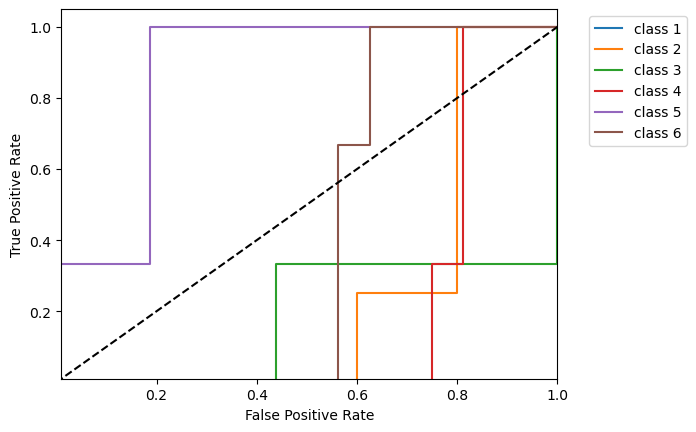

In [209]:
def confusion_matrix_MultinomialNB(best_l):
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
   
          
    for i,files in enumerate(trainfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df.at[i,'class']=1
        elif('lying' in files):
            df.at[i,'class']=2
        elif('cycling' in files):
            df.at[i,'class']=3
        elif('sitting' in files):
            df.at[i,'class']=4
        elif('standing' in files):
             df.at[i,'class']=5
        elif('walking' in files):
            df.at[i,'class']=6
    col=df.shape[1]
    
    
    
    for i,files in enumerate(testfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df1.at[i,'class']=1
        elif('lying' in files):
            df1.at[i,'class']=2
        elif('cycling' in files):
            df1.at[i,'class']=3
        elif('sitting' in files):
            df1.at[i,'class']=4
        elif('standing' in files):
             df1.at[i,'class']=5
        elif('walking' in files):
            df1.at[i,'class']=6
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    
    NB_Model1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    result_MultinomialNB = NB_Model1.fit(X_train,Y_train)
    Y_predict=result_MultinomialNB.predict(X_test)
    cm=confusion_matrix(Y_predict,Y_test)  
    print("Confusion Matrix for Naive Bayes using MultinNomial Distribution")
    print(cm)

    
def roc_curve_MultinomialNB(best_l):
    df = split_training_binary(best_l)
    df1 = split_testing_binary(best_l)
    
    
    for i,files in enumerate(trainfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df.at[i,'class']=1
        elif('lying' in files):
            df.at[i,'class']=2
        elif('cycling' in files):
            df.at[i,'class']=3
        elif('sitting' in files):
            df.at[i,'class']=4
        elif('standing' in files):
             df.at[i,'class']=5
        elif('walking' in files):
            df.at[i,'class']=6
    col=df.shape[1]
    
    
    
    for i,files in enumerate(testfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df1.at[i,'class']=1
        elif('lying' in files):
            df1.at[i,'class']=2
        elif('cycling' in files):
            df1.at[i,'class']=3
        elif('sitting' in files):
            df1.at[i,'class']=4
        elif('standing' in files):
             df1.at[i,'class']=5
        elif('walking' in files):
            df1.at[i,'class']=6
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    
    
    NB_Model1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    result_MultinomialNB = NB_Model1.fit(X_train,Y_train)
    
    Y_predict=result_MultinomialNB.predict(X_test)
    #cm=confusion_matrix(Y_predict,Y_train)
    limit=np.arange(0,6,1)
    Y_scores=result_MultinomialNB.predict_proba(X_test)
    fp_rate=dict()
    tp_rate=dict()
    R_Auc=dict()
    print("\nROC curve")
    for i,j in enumerate(limit):
        fp_rate[j], tp_rate[j], _= roc_curve(Y_test, Y_scores[:, j],pos_label=j)
        R_Auc[j] = auc(fp_rate[j], tp_rate[j])
    plt.figure()
    class_range=np.arange(0,6,1)
    for j,i in enumerate(class_range):
        plt.plot(fp_rate[i],tp_rate[i],label='class %i'%(i+1)%R_Auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.01, 1.0])
    plt.ylim([0.01, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=2,bbox_to_anchor=(1.05,1.0))
    plt.show()
    
    
confusion_matrix_MultinomialNB(nb_best_l_test)
roc_curve_MultinomialNB(nb_best_l_test)

##### Naive Bayes using Gaussian Distribution

In [210]:
def naive_bayes_gaussian():
    maxNB2_accuracy=0
    bestscore_gaussian=0
    best_l_NB2=1
    for l in range(1,21):
        df = split_training_binary(l)
           
        for i,files in enumerate(trainfile_paths):
            
            if(('bending1' in files) or ('bending2' in files)):
                df.at[i,'class']=1
            elif('lying' in files):
                df.at[i,'class']=2
            elif('cycling' in files):
                df.at[i,'class']=3
            elif('sitting' in files):
                df.at[i,'class']=4
            elif('standing' in files):
                df.at[i,'class']=5
            elif('walking' in files):
                df.at[i,'class']=6
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
             
        NB_model2 = GaussianNB()
        result = NB_model2.fit(X_train,Y_train)
        scoresGaussian=result.score(X_train,Y_train)
        
        if(scoresGaussian>bestscore_gaussian):
            best_l_NB2=l
            bestscore_gaussian=scoresGaussian
        #print("L:",l,"Accuarcy:",scoresGaussian)
            
    table=Texttable()
    table.add_rows([['Training Accuracy','Best L', 'Train Error'],[bestscore_gaussian,best_l,1-bestscore_gaussian]])
    print("\nBest L & Training accuarcy naive Bayes using Gaussian Distribution: \n",table.draw())
    return bestscore_gaussian,best_l_NB2

bestscore_gaussian ,best_l_nb2= naive_bayes_gaussian()


Best L & Training accuarcy naive Bayes using Gaussian Distribution: 
 +-------------------+--------+-------------+
| Training Accuracy | Best L | Train Error |
+===================+========+=============+
| 0.971             | 1      | 0.029       |
+-------------------+--------+-------------+


##### Calculating Testing Error for Naive Bayes using Gaussian Distribution

In [211]:
def naive_bayes_gaussian_test():
    maxNB2_accuracy=0
    bestscore_gaussian=0
    best_l_NB2=1
    cm1=0
    for l in range(1,21):
        df = split_training_binary(best_l)
        df1 = split_testing_binary(best_l)


        for i,files in enumerate(trainfile_paths):
            if(('bending1' in files) or ('bending2' in files)):
                df.at[i,'class']=1
            elif('lying' in files):
                df.at[i,'class']=2
            elif('cycling' in files):
                df.at[i,'class']=3
            elif('sitting' in files):
                df.at[i,'class']=4
            elif('standing' in files):
                 df.at[i,'class']=5
            elif('walking' in files):
                df.at[i,'class']=6
        col=df.shape[1]



        for i,files in enumerate(testfile_paths):
            if(('bending1' in files) or ('bending2' in files)):
                df1.at[i,'class']=1
            elif('lying' in files):
                df1.at[i,'class']=2
            elif('cycling' in files):
                df1.at[i,'class']=3
            elif('sitting' in files):
                df1.at[i,'class']=4
            elif('standing' in files):
                 df1.at[i,'class']=5
            elif('walking' in files):
                df1.at[i,'class']=6
        col2=df1.shape[1]

        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        X_test = df1.iloc[:,:(col2-2)]
        Y_test = df1.loc[:,'class']
    
             
        NB_model2 = GaussianNB()
        result = NB_model2.fit(X_train,Y_train)
        
        Y_predict=result.predict(X_test)
        
        #scoresGaussian= accuracy_score(Y_test,Y_predict, normalize = True)
        scoresGaussian=result.score(X_test,Y_test)
        cm=confusion_matrix(Y_predict,Y_test)  
        
        if(scoresGaussian>bestscore_gaussian):
            best_l_NB2=l
            bestscore_gaussian=scoresGaussian
            cm1=cm
            
        #print("L:",l,"Accuarcy:",scoresGaussian)
            
    table=Texttable()
    table.add_rows([['Testing Accuracy','Best L', 'Test Error'],[bestscore_gaussian,best_l,1-bestscore_gaussian]])
    print("\nBest L & Testing accuracy naive Bayes using Gaussian Distribution: \n",table.draw())
    return bestscore_gaussian,best_l_NB2,cm1

bestscore_gaussian_test ,best_l_nb2_test,cm1= naive_bayes_gaussian_test()


Best L & Testing accuracy naive Bayes using Gaussian Distribution: 
 +------------------+--------+------------+
| Testing Accuracy | Best L | Test Error |
+==================+========+============+
| 0.895            | 1      | 0.105      |
+------------------+--------+------------+


##### Confusion Matrix for Naive Bayes using Gaussian Distribution

Confusion Matrix for Naive Bayes using Gaussian Distribution
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


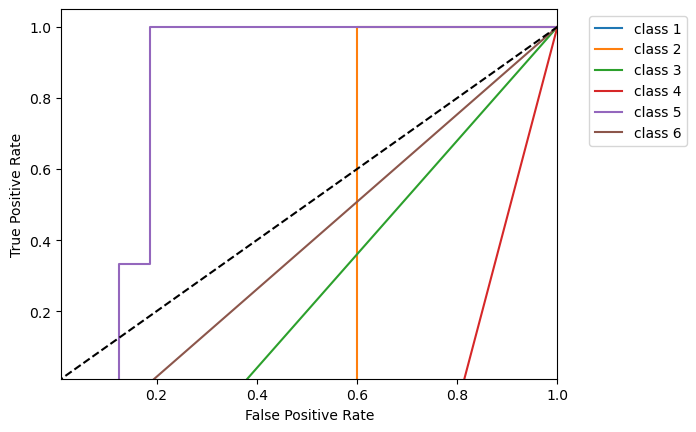

In [212]:
#print("Confusion matrix\n",cm1)

def confusion_matrix_GaussianNB(best_l):
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
   
    
    for i,files in enumerate(trainfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df.at[i,'class']=1
        elif('lying' in files):
            df.at[i,'class']=2
        elif('cycling' in files):
            df.at[i,'class']=3
        elif('sitting' in files):
            df.at[i,'class']=4
        elif('standing' in files):
            df.at[i,'class']=5
        elif('walking' in files):
            df.at[i,'class']=6
    col=df.shape[1]


    for i,files in enumerate(testfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df1.at[i,'class']=1
        elif('lying' in files):
            df1.at[i,'class']=2
        elif('cycling' in files):
            df1.at[i,'class']=3
        elif('sitting' in files):
            df1.at[i,'class']=4
        elif('standing' in files):
            df1.at[i,'class']=5
        elif('walking' in files):
            df1.at[i,'class']=6
    col2=df1.shape[1]

    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    
    NB_Model2 = GaussianNB()
    result_GaussianNB = NB_Model2.fit(X_train,Y_train)
    Y_predict=result_GaussianNB.predict(X_test)
    cm=confusion_matrix(Y_predict,Y_test)  
    
    print("Confusion Matrix for Naive Bayes using Gaussian Distribution")
    print(cm)

    
def roc_curve_GaussianNB(best_l):
    
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
   
    
    for i,files in enumerate(trainfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df.at[i,'class']=1
        elif('lying' in files):
            df.at[i,'class']=2
        elif('cycling' in files):
            df.at[i,'class']=3
        elif('sitting' in files):
            df.at[i,'class']=4
        elif('standing' in files):
            df.at[i,'class']=5
        elif('walking' in files):
            df.at[i,'class']=6
    col=df.shape[1]


    for i,files in enumerate(testfile_paths):
        if(('bending1' in files) or ('bending2' in files)):
            df1.at[i,'class']=1
        elif('lying' in files):
            df1.at[i,'class']=2
        elif('cycling' in files):
            df1.at[i,'class']=3
        elif('sitting' in files):
            df1.at[i,'class']=4
        elif('standing' in files):
            df1.at[i,'class']=5
        elif('walking' in files):
            df1.at[i,'class']=6
    col2=df1.shape[1]

    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    
     
    NB_Model2 = GaussianNB()
    result_GaussianNB = NB_Model2.fit(X_train,Y_train)
    Y_predict=result_GaussianNB.predict(X_test)
    cm=confusion_matrix(Y_predict,Y_test)
    limit=np.arange(0,6,1)
    Y_scores=result_GaussianNB.predict_proba(X_test)
    fp_rate=dict()
    tp_rate=dict()
    R_Auc=dict()
    for i,j in enumerate(limit):
        fp_rate[j], tp_rate[j], _= roc_curve(Y_test, Y_scores[:, j],pos_label=j)
        R_Auc[j] = auc(fp_rate[j], tp_rate[j])
    plt.figure()
    for j,i in enumerate(limit):
        plt.plot(fp_rate[i],tp_rate[i],label='class %i'%(i+1)%R_Auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.01, 1.0])
    plt.ylim([0.01, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=2,bbox_to_anchor=(1.05,1.0))
    plt.show()
    
    
confusion_matrix_GaussianNB(best_l_nb2)
roc_curve_GaussianNB(best_l_nb2)

#### ii. Comparison

<font color='blue'>
NB Multinomial Training Accuracy: 0.942 <br>
NB Multinomial Testing Accuracy :0.895<br>


NB Gaussian Training Accuracy: 0.97<br>
NB Gaussian Testing Accuracy :0.895<br>

We can see that both Model's Test accuracy is approximately same, both models are suitable for this dataset.<br>
</font>



## 3. ISLR 4.8.3

Note:I have attached pdf files in notebook folder as Q4_7_3.pdf

## 4. ISLR 4.8.7

Note:I have attached pdf files in notebook folder as Q4_7_7.pdf